In [1]:
input_file='repapers2.xml'
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import numpy as np
from collections import Counter
import seaborn as sns
import json


tree= ET.parse(input_file)
root= tree.getroot()
#print(root.tag)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
import warnings
warnings.filterwarnings('ignore')

In [2]:
lst1=root.findall('PubmedArticle/MedlineCitation/Article')
lst2=root.findall('PubmedArticle/PubmedData/History/PubMedPubDate[@PubStatus="pubmed"]/Year')
lst3=root.findall('PubmedArticle/MedlineCitation')
lst4=root.findall('PubmedArticle/PubmedData/History/PubMedPubDate[@PubStatus="pubmed"]')
journal=[]
year=[]
month=[]
day=[]
authors=[]
instt=[]
article=[]
mesh=[]
abstract=[]
pubyear=[]
abb_authors=[]
pubmonth=[]
pubday=[]
re_year=[]
ret_year=[]
ret_month=[]
ret_date=[]

In [3]:
# get lists of journal name, article title, authors, affiliation
for item in lst1:
    j=item.find('Journal/Title')
    journal.append(j.text)
    
    a=item.find('ArticleTitle').text
    article.append(a)
    
    k=item.find('Journal/JournalIssue/PubDate/Year')
    if k is not None:
        pubyear.append(k.text)
    else:
        pubyear.append('None')
    
    m=item.find('Journal/JournalIssue/PubDate/Month')
    if m is not None:
        pubmonth.append(m.text)
    else:
        pubmonth.append('None')
    
    d=item.find('Journal/JournalIssue/PubDate/Day')
    if d is not None:
        pubday.append(d.text)
    else:
        pubday.append('None')
    
    x=item.findall('AuthorList/Author[@ValidYN="Y"]')
    
    author_small=[]
    affiliation_=[]
    short_name=[]
    for component in x:
        
        lname = ''
        fname = ''
        
        d=component.find('LastName')
        if d is not None:
            lname = d.text
        e = component.find('ForeName')
        if e is not None:
            fname = e.text
            name = fname + ' ' + lname 
        else:
            name=lname
        author_small.append(name)
        f=component.find('Initials')
        if f is not None:
            iname=f.text
            sname=iname + ' ' + lname
        else:
            sname = lname
        short_name.append(sname)

        aff=''
        c=component.findall('AffiliationInfo/Affiliation')
        if c is not None:
            for i in c:
            
                aff=i.text
                aff=aff 
        
        else:
            aff='None'
            
        
        affiliation_.append(aff)
    authors.append(','.join(author_small))
    instt.append(affiliation_)
    abb_authors.append(','.join(short_name))
    y=item.find('Abstract')
    if y is not None:
        w=y.findall('AbstractText')
        k=[]
        for i in w:
            z=i.text
            if z:
                k.append(z)
        l='\n'.join(k)    
        abstract.append(l)
    else:
        abstract.append(None)


# remving email add from affiliation
lstz=[]

for compo in instt:
    lsty=[]
    for item in compo:
        
        
   
        pattern=re.compile('.+\s.+@.+\.')
        if pattern.match(item):
        
            a=re.sub('[^ ]+@.+\.', '', item)
            
            if 'Electronic address:' in a:
                a=a.replace('Electronic address: ','')
            #introduces '','' twice in some cases
            lsty.append(a)
        else:
            lsty.append(item)
    lstz.append(lsty)



lsto=[]
for lsti in lstz[:10]:
    lstx=[]
    
    for i in lsti:
        if len(i)==1:
            lstx.append(i)
        else:
            z=i.split(', ')
            while z and z[-1] == '':
                z.pop()
            
            lstx.append(''.join(z[-1:]))
    lsto.append(lstx)
 

In [4]:
# finding publication year - using regular exp        
for item in lst2:
    y=item.text
    year.append(y)
for item in lst4:
    a=item.find('Month')
    if a is not None:
        month.append(a.text)
    else:
        month.append('None')
for  item in lst4:
    b=item.find('Day')
    if b is not None:
        day.append(b.text)
    else:
        day.append('None')
        
retract_year=[]           
for item in lst3:
    a=item.find('CommentsCorrectionsList/CommentsCorrections[@RefType="RetractionIn"]/RefSource')
    if a is not None:
        b=a.text
        retract_year.append(b)

    else:
        retract_year.append('None')
re_year=[]

ret_year=[]
for i in retract_year:
    pattern=re.compile('^.+\s\d{4}.+')
    if pattern.match(i):
        
        a=re.findall('\.\s(\d{4})', i)
        
        re_year.append(' '.join(a))
    else:
        pattern=re.compile('^.+\.\d{4}\.')
        if pattern.match(i):
            b=re.findall('\.(\d{4})\.',i)
            re_year.append(' '.join(b))
        else:
            re_year.append('None')

for i in retract_year:
    pattern=re.compile('^.+\s\d{4}.+')
    if pattern.match(i):
        
        a=re.findall('\.\s(\d{4}\s[A-Za-z]{3})', i)
        if a is not None:
            ret_year.append(' '.join(a))
        else:
            b=re.findall('\.\s(\d{4}\s[A-Za-z]{3})', i)
            ret_year.append(' '.join(b))
    
    else:
        pattern=re.compile('^.+\.\d{4}\.')
        if pattern.match(i):
            c=re.findall('\.(\d{4})\.',i)
            ret_year.append(' '.join(c))
        else:
            ret_year.append('None')

ret_month=[]
for i in retract_year:
    pattern=re.compile('^.+\s\d{4}.+')
    if pattern.match(i):
        
        a=re.findall('\.\s\d{4}\s([A-Za-z]{3})', i)
        if a is not None:
            ret_month.append(' '.join(a))
        
        else:
            ret_month.append('None')
    else:
        ret_month.append('None')
            
ret_date=[]
for i in retract_year:
    pattern=re.compile('^.+\s\d{4}.+')
    if pattern.match(i):
        
        a=re.findall('\.\s\d{4}\s[A-Za-z]{3}\s(\d+)', i)
        if a is not None:
            ret_date.append(' '.join(a))
        else:
            ret_date.append('None')
    else:
        ret_date.append('None')
    


In [5]:
# get keywords
keys=[]

for item in lst3:
    w=item.find('KeywordList')
    if w is not None:
        key=[]
        z=w.findall('Keyword')
        for component in z:
            
            y=component.text
            key.append(y)
        keyx=','.join(key)
        keys.append(keyx)

    else:
        keys.append(None)

In [6]:
# get mesh heading
descrip=[]
qualif=[]
for item in lst3:
    a=item.find('MeshHeadingList')
    if a is not None:
        b=a.findall('MeshHeading')
        des=[]
        qua = []
        for component in b:
            desc = component.find('DescriptorName')
            quals = component.findall('QualifierName')
            if desc is not None and desc.attrib['MajorTopicYN'] == 'Y':
                des.append(desc.text)
            elif quals:
                qualtexts = [qual.text for qual in quals if qual.attrib['MajorTopicYN'] == 'Y']
                if qualtexts:
                    qua.append(' '.join(qualtexts))
                    des.append(desc.text)
    else:
        des=['None']
        qua=['None']
    descrip.append(','.join(des))
    
    qualif.append(','.join (qua)) 


In [7]:
# checking sizes
print('article', len(article))
print('year', len(year))
print('authors', len(authors))
print('journal', len(journal))
print('instt', len(instt))
print('abstract', len(abstract))
print('keys', len(keys))
print('re_year', len(re_year))

article 6485
year 6485
authors 6485
journal 6485
instt 6485
abstract 6485
keys 6485
re_year 6485


In [8]:
#making a dataframe called retraction
retraction=pd.DataFrame({'article':article, 'year':year,'month':month,'day':day, 'authors':authors,'journal':journal, 'affiliation':instt, 'abstract':abstract,'keys':keys,  'retraction_year':re_year,'retraction_date':ret_year,'retraction_month':ret_month,'retraction_day':ret_date,'pub_year':pubyear, 'pub_month':pubmonth,'pub_day':pubday,'abbname':abb_authors})
print(retraction.head(2))

                                             article  year month day  \
0  Inhibition of KCNQ2/3 channels by HN38 and XE9...  2018    12   7   
1  Retracted: Long Noncoding RNA SOX2OT Accelerat...  2018    11  28   

                                             authors                 journal  \
0  Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...  Molecular pharmacology   
1  Li Ma,Xingzhen Sun,Wenxia Kuai,Jian Hu,Yufang ...    DNA and cell biology   

                                         affiliation  \
0  [University of Connecticut., University of Con...   
1  [Department of Pediatrics, The Affiliated Huai...   

                                            abstract  \
0  Recent studies identified HN38 as a novel KCNQ...   
1  ATCC. www.lgcstandards-atcc.org/Products/All/C...   

                                keys retraction_year retraction_date  \
0  Epilepsy,Ion channels,Kv channels            2019        2019 Feb   
1  FOXP4,SOX2OT,Wilms’ tumor,miR-363            2018        

In [9]:
retraction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 17 columns):
article             6485 non-null object
year                6485 non-null object
month               6485 non-null object
day                 6485 non-null object
authors             6485 non-null object
journal             6485 non-null object
affiliation         6485 non-null object
abstract            6102 non-null object
keys                1054 non-null object
retraction_year     6485 non-null object
retraction_date     6485 non-null object
retraction_month    6485 non-null object
retraction_day      6485 non-null object
pub_year            6485 non-null object
pub_month           6485 non-null object
pub_day             6485 non-null object
abbname             6485 non-null object
dtypes: object(17)
memory usage: 861.4+ KB


### Retraction with years

In [11]:
retraction[retraction['pub_year']=='None']['article'].count()

203

There are 203 entries with missing publication year.

In [12]:
retraction[retraction['pub_year']=='1959']

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname
6484,On the primary site of nuclear RNA synthesis.,1959,10,1,"L GOLDSTEIN,J MICOU",The Journal of biophysical and biochemical cyt...,"[, ]",None,RIBONUCLEIC ACID/metabolism,1966,1966 Oct,Oct,,1959,Oct,None,"L GOLDSTEIN,J MICOU"


Text(0.5,1,'Fig 1 : Retracted publications by year')

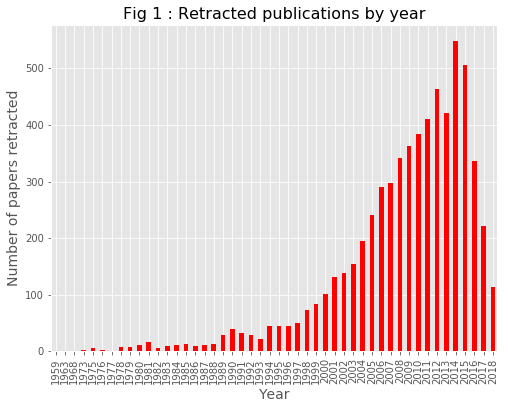

In [13]:
#plotting retracted papers based on year of publication
plt.style.use('ggplot')
retract_x=retraction.drop(retraction[retraction['pub_year']=='None'].index)
plt.style.use('ggplot')
fig, ax= plt.subplots(figsize=(8,6))
retract_x.groupby('pub_year')['article'].count().plot(kind='bar', color='red')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of papers retracted', fontsize=14)
plt.title('Fig 1 : Retracted publications by year', fontsize=16)

In [690]:
print(retraction[retraction['pub_year']=='2000']['article'].count())
print(retraction[retraction['pub_year']=='2010']['article'].count())
print(retraction[retraction['pub_year']=='2007']['article'].count())
retraction[retraction['pub_year']=='2015']['article'].count()

101
384
298


506

#number of papers published was obtained from pubmed 
Number of papers published in 2000 =531946, Number of papers retracted=101, ratio/retraction rate =0.0001898
Number of papers published in 2007 =786472,Number of papers retracted=298, ratio=0.0003789
Number of papers published in 2010 =942504,Number of papers retracted=384, ratio=0.0004074
Number of papers published in 2015 =1258647,Number of papers retracted=506, ratio=0.0004020


This plot shows that number of publications that are getting retracted is increasing with years.

In [691]:
retraction[retraction['retraction_year']=='None']['article'].count()

48

In [692]:
retraction[retraction['retraction_year']=='']['article'].count()

2

There are 50 entries with missing retraction year.

Text(0.5,1,'Number of retractions per year')

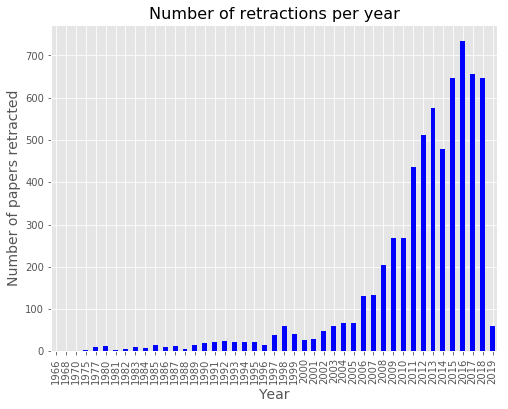

In [693]:
#plotting retracted papers based on year of retraction
retract_y=retraction.drop(retraction[retraction['retraction_year']=='None'].index)
retract_y=retract_y.drop(retract_y[retract_y['retraction_year']==''].index)
fig, ax= plt.subplots(figsize=(8,6))
retract_y.groupby('retraction_year')['article'].count().plot(kind='bar', color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of papers retracted', fontsize=14)
plt.title('Number of retractions per year', fontsize=16)

This plot shows that total number of retractions is increasing.

Text(0.5,1,'Fig 2: Number of retractions per year')

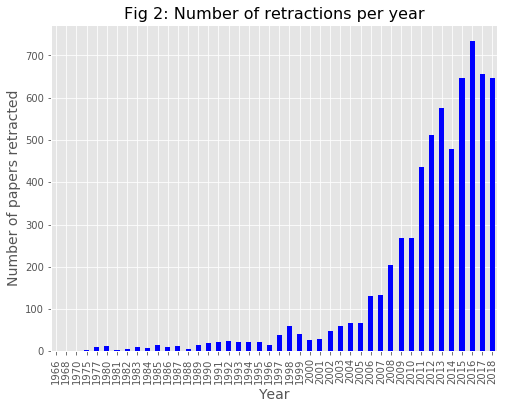

In [694]:
#I have dropped the year 2019 here, so as to avoid readers' confusion 
retract_a=retract_y.drop(retract_y[retract_y['retraction_year']=='2019'].index)
fig, ax= plt.subplots(figsize=(8,6))
retract_a.groupby('retraction_year')['article'].count().plot(kind='bar', color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of papers retracted', fontsize=14)
plt.title('Fig 2: Number of retractions per year', fontsize=16)

Next I was interested in finding out how much time it takes for a paper to be retracted i.e. the time between publication and retraction. This is been worked upon next.

As the first analysis in this I just checked the difference between the years of publication and retraction, without taking into account the precise date.

In [695]:
retract_x=retract_x.drop(retract_x[retract_x['retraction_year']=='None'].index)
retract_z=retract_x.drop(retract_x[retract_x['retraction_year']==''].index)
retract_z['pub_year']=retract_z['pub_year'].astype(int)
retract_z['retraction_year']=retract_z['retraction_year'].astype(int)
retract_z['minus_z']=retract_z['retraction_year'].subtract(retract_z['pub_year'])
retract_z=retract_z.drop(index=747)
retract_z=retract_z.drop(retract_z[retract_z['minus_z']==-3].index)
retract_z['minus_z']=retract_z['minus_z'].abs()
retract_z['minus_z'].value_counts()

1     1556
0     1075
2      905
3      590
4      455
5      343
6      254
7      208
9      152
8      145
10     103
11     100
12      80
15      58
13      57
14      56
16      35
17      17
18      16
19       6
26       4
25       4
24       4
21       3
20       3
22       2
28       1
27       1
Name: minus_z, dtype: int64

Text(0.5,1,'Number of retractions in given number of years')

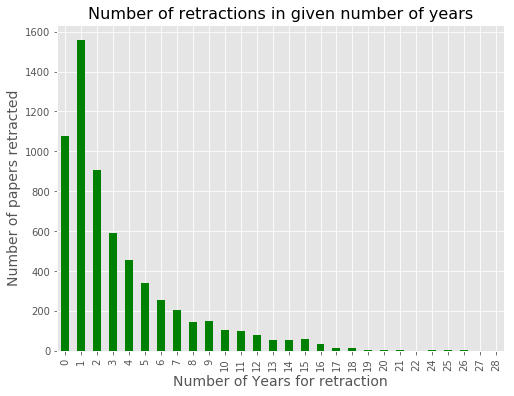

In [696]:
fig, ax= plt.subplots(figsize=(8,6))
retract_z['minus_z'].value_counts().sort_index().plot(kind='bar', color='green')
plt.xlabel('Number of Years for retraction', fontsize=14)
plt.ylabel('Number of papers retracted', fontsize=14)
plt.title('Number of retractions in given number of years', fontsize=16)

In [697]:
retract_z['minus_z'].describe()

count    6233.000000
mean        3.439275
std         3.901369
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        28.000000
Name: minus_z, dtype: float64

In [698]:
retract_z[retract_z['minus_z']==28]

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title,minus_z
6382,Increasing the response rate to cytotoxic chem...,1985,12,1,"M E Lippman,J Cassidy,M Wesley,R C Young",journal of steroid biochemistry,"[, , , ]",Cloned cell lines of human breast cancer can b...,None,2013,2013 Jan,Jan,,1985,Dec,None,"ME Lippman,J Cassidy,M Wesley,RC Young",1985-12-01,Dec,1,Dec,15,journalofsteroidbiochemistry,28


In order to get the precise dates and then the exact difference between publication and retraction, following steps were taken.

In [699]:
retraction[retraction['retraction_month']=='']['article'].count()

627

In [700]:
retraction[(retraction['retraction_month']=='') & (retraction['pub_month']=='None')]['article'].count()

387

In [701]:
retraction[retraction['pub_month']=='None']['article'].count()

896

As there were 387 observations for which both retraction month and pub month were missing, suggesting that in addition 627 of missing retraction date, there were in adddition 509 unique observations with missing pub month..thus, there were 1136 unique missing pub month and retraction date observations (19% of the dataset). 

In [702]:
retraction[(retraction['pub_month']=='None') & (retraction['retraction_date']=='')].count()

article               387
year                  387
month                 387
day                   387
authors               387
journal               387
affiliation           387
abstract              373
keys                  103
retraction_year       387
retraction_date       387
retraction_month      387
retraction_day        387
pub_year              387
pub_month             387
pub_day               387
abbname               387
pubmed_date           387
pubmed_month          387
newday                387
newmonth              387
new_retraction_day    387
title                 387
dtype: int64

In [703]:
retraction[retraction['month']=='None']['article'].count()

0

In [704]:
retraction[retraction['month']=='']['article'].count()

0

In [705]:
retraction[retraction['day']=='None']['article'].count()

0

In [706]:
retraction[retraction['day']=='']['article'].count()

0

In [707]:
retraction['pub_day'].unique()

array(['30', '27', '13', 'None', '19', '17', '16', '11', '14', '03', '07',
       '01', '21', '15', '02', '22', '28', '06', '05', '23', '09', '12',
       '18', '10', '25', '20', '26', '31', '04', '08', '24', '29'],
      dtype=object)

In [708]:
retraction['pub_month'].unique()

array(['Nov', 'None', 'Oct', 'Sep', 'Aug', 'Jul', 'Apr', 'May', 'Jun',
       'Mar', 'Dec', 'Jan', 'Feb'], dtype=object)

In [709]:
retraction['pub_year'].unique()

array(['2018', 'None', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2005', '2007', '2004', '2000',
       '2003', '2006', '2001', '1999', '2002', '1998', '1997', '1996',
       '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988',
       '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980',
       '1979', '1978', '1977', '1976', '1975', '1973', '1968', '1963',
       '1959'], dtype=object)

In [710]:
retraction['day'].unique()

array(['7', '28', '16', '24', '20', '17', '15', '14', '12', '9', '23',
       '21', '4', '25', '5', '22', '2', '29', '26', '13', '11', '8', '3',
       '18', '10', '27', '6', '1', '30', '19', '31'], dtype=object)

In [711]:
retraction['year'].unique()

array(['2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011',
       '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003',
       '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995',
       '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987',
       '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1973', '1968', '1963', '1959'],
      dtype=object)

In [712]:
retraction['month'].unique()

array(['12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1'],
      dtype=object)

In [713]:
retraction['pubmed_date']=pd.to_datetime(retraction['year']+'-'+retraction['month']+'-'+retraction['day'])
retraction.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...",molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019 Feb,Feb,,2018,Nov,30,"E Rodier,Z Niday,K Doci,L Wang,FJ Nan,ZB Gao,A...",2018-12-07,Dec,30,Nov,15,molecularpharmacology
1,Retracted: Long Noncoding RNA SOX2OT Accelerat...,2018,11,28,"Li Ma,Xingzhen Sun,Wenxia Kuai,Jian Hu,Yufang ...",dna and cell biology,"[Department of Pediatrics, The Affiliated Huai...",ATCC. www.lgcstandards-atcc.org/Products/All/C...,"FOXP4,SOX2OT,Wilms’ tumor,miR-363",2018,2018 Dec,Dec,21,2018,Nov,27,"L Ma,X Sun,W Kuai,J Hu,Y Yuan,W Feng,X Lu",2018-11-28,Nov,27,Nov,21,dnaandcellbiology


In [714]:
cal_map={'1':'Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul', '8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}

In [715]:
cal_map2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [716]:
def get_replacement(s):
    if s.isdigit():
        return cal_map2[int(s)-1]
    else:
        return s
retraction['pub_month']=retraction['pub_month'].apply(get_replacement)

In [717]:
retraction['pub_month'].unique()

array(['Nov', 'None', 'Oct', 'Sep', 'Aug', 'Jul', 'Apr', 'May', 'Jun',
       'Mar', 'Dec', 'Jan', 'Feb'], dtype=object)

In [718]:
retraction['pubmed_month']=retraction['month'].apply(lambda x: cal_map[x])
retraction.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...",molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019 Feb,Feb,,2018,Nov,30,"E Rodier,Z Niday,K Doci,L Wang,FJ Nan,ZB Gao,A...",2018-12-07,Dec,30,Nov,15,molecularpharmacology
1,Retracted: Long Noncoding RNA SOX2OT Accelerat...,2018,11,28,"Li Ma,Xingzhen Sun,Wenxia Kuai,Jian Hu,Yufang ...",dna and cell biology,"[Department of Pediatrics, The Affiliated Huai...",ATCC. www.lgcstandards-atcc.org/Products/All/C...,"FOXP4,SOX2OT,Wilms’ tumor,miR-363",2018,2018 Dec,Dec,21,2018,Nov,27,"L Ma,X Sun,W Kuai,J Hu,Y Yuan,W Feng,X Lu",2018-11-28,Nov,27,Nov,21,dnaandcellbiology


In [719]:
retraction[retraction['pubmed_month']==retraction['pub_month']]['article'].count()

1952

In [720]:
retraction[retraction['year']==retraction['pub_year']]['article'].count()

5308

In [721]:
def get_date(row):
    if (row.pub_year==row.year) & (row.pub_month==row.pubmed_month):
        return row.pub_day if row.pub_day != 'None' else row.day
    
    else:
        return row.pub_day
retraction['newday'] = retraction.apply(get_date, axis=1)

In [722]:
retraction.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...",molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019 Feb,Feb,,2018,Nov,30,"E Rodier,Z Niday,K Doci,L Wang,FJ Nan,ZB Gao,A...",2018-12-07,Dec,30,Nov,15,molecularpharmacology
1,Retracted: Long Noncoding RNA SOX2OT Accelerat...,2018,11,28,"Li Ma,Xingzhen Sun,Wenxia Kuai,Jian Hu,Yufang ...",dna and cell biology,"[Department of Pediatrics, The Affiliated Huai...",ATCC. www.lgcstandards-atcc.org/Products/All/C...,"FOXP4,SOX2OT,Wilms’ tumor,miR-363",2018,2018 Dec,Dec,21,2018,Nov,27,"L Ma,X Sun,W Kuai,J Hu,Y Yuan,W Feng,X Lu",2018-11-28,Nov,27,Nov,21,dnaandcellbiology


In [723]:
retraction[retraction['newday']=='None']['article'].count()

3360

In [724]:
def get_date(row):
    if row.pub_year==row.year :
        return row.pub_day if row.pub_day != 'None' else row.day
    
    else:
        return row.pub_day
retraction['newday'] = retraction.apply(get_date, axis=1)

In [725]:
retraction[retraction['newday']=='None']['article'].count()

948

In [726]:
def get_month(row):
    if row.pub_year==row.year :
        return row.pub_month if row.pub_month != 'None' else row.pubmed_month
    
    else:
        return row.pub_month
retraction['newmonth'] = retraction.apply(get_month, axis=1)

In [727]:
retraction[retraction['newmonth']=='None']['article'].count()

279

In [728]:
retraction[(retraction['newday']=='None') & (retraction['newmonth']=='None')]['article'].count()

279

In [729]:
retract_dates=retraction.drop(retraction[retraction['newday']=='None'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['newmonth']=='None'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['pub_year']=='None'].index)

In [730]:
retract_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537 entries, 0 to 6484
Data columns (total 23 columns):
article               5537 non-null object
year                  5537 non-null object
month                 5537 non-null object
day                   5537 non-null object
authors               5537 non-null object
journal               5537 non-null object
affiliation           5537 non-null object
abstract              5215 non-null object
keys                  848 non-null object
retraction_year       5537 non-null object
retraction_date       5537 non-null object
retraction_month      5537 non-null object
retraction_day        5537 non-null object
pub_year              5537 non-null object
pub_month             5537 non-null object
pub_day               5537 non-null object
abbname               5537 non-null object
pubmed_date           5537 non-null datetime64[ns]
pubmed_month          5537 non-null object
newday                5537 non-null object
newmonth              5537

We have lost nearly 15% of the data in the above operation.

In [731]:
retract_dates['publication_date']=pd.to_datetime(retract_dates['pub_year']+'-'+retract_dates['newmonth']+'-'+retract_dates['newday'], errors='coerce')
#retract_dates.head(10)

In [732]:
#checking the unique values 
retraction['retraction_day'].unique()

array(['', '21', '20', '27', '14', '12', '10', '23', '19', '18', '26',
       '28', '29', '11', '5', '1', '15', '17', '04', '24', '25', '22',
       '16', '30', '31', '2', 'None', '4', '6', '09', '02', '13', '03',
       '7', '8', '9', '01', '07', '3', '06', '05', '08'], dtype=object)

In [733]:
retraction[retraction['retraction_day']=='']['article'].count()

4003

In [734]:
retraction[retraction['retraction_day']=='None']['article'].count()

64

In total, 4067 values are missing for retraction day.

In [735]:
# filled missing retraction days with 15 (middle of the month)
def get_retraction_day(x):
    if x=='None' or x=='':
        return '15'
    else:
        return x
retraction['new_retraction_day']=retraction['retraction_day'].apply(get_retraction_day)


In [736]:
retraction['retraction_month'].unique()

array(['Feb', 'Dec', 'Jan', 'Oct', 'Nov', 'Aug', 'Sep', 'May', '', 'Jul',
       'Jun', 'Mar', 'Apr', 'None', 'Win', 'Fal', 'Sum', 'Spr'],
      dtype=object)

In [737]:
retraction[retraction['retraction_month']=='']['article'].count()

627

In [738]:
retraction[retraction['retraction_month']=='None']['article'].count()

64

In [739]:
retraction[retraction['retraction_month']=='Win']['article'].count()

3

In [740]:
retraction[retraction['retraction_month']=='Fal']['article'].count()

1

In [741]:
retraction[retraction['retraction_month']=='Sum']['article'].count()

3

In [742]:
retraction[retraction['retraction_month']=='Spr']['article'].count()

1

In [743]:
#retract_dates=retract_dates.drop(retract_dates[(retract_dates['retraction_month']=='') or (retract_dates['retraction_month']=='None') or (retract_dates['retraction_month']=='Win') or (retract_dates['retraction_month']=='Fall') or (retract_dates['retraction_month']=='Sum') or (retract_dates['retraction_month']=='Spr')].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['retraction_month']==''].index) 
retract_dates=retract_dates.drop(retract_dates[retract_dates['retraction_month']=='None'].index) 
retract_dates=retract_dates.drop(retract_dates[retract_dates['retraction_month']=='Win'].index) 
retract_dates=retract_dates.drop(retract_dates[retract_dates['retraction_month']=='Sum'].index) 
retract_dates=retract_dates.drop(retract_dates[retract_dates['retraction_month']=='Fall'].index) 
retract_dates=retract_dates.drop(retract_dates[retract_dates['retraction_month']=='Spr'].index) 

In [744]:
retraction['retraction_year'].unique()

array(['2019', '2018', '2017', 'None', '2015', '2016', '', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997',
       '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981',
       '1980', '1977', '1975', '1970', '1968', '1966'], dtype=object)

In [745]:
retraction[retraction['retraction_year']=='']['article'].count()

2

In [746]:
retraction[retraction['retraction_year']=='None']['article'].count()

48

In [747]:
retract_dates=retract_dates.drop(retract_dates[retract_dates['retraction_year']==''].index) 
retract_dates=retract_dates.drop(retract_dates[retract_dates['retraction_year']=='None'].index) 

In [748]:
retract_dates['new_retraction_day']=retract_dates['retraction_day'].apply(get_retraction_day)

In [749]:
retract_dates['retraction_date']=pd.to_datetime(retract_dates['retraction_year']+'-'+retract_dates['retraction_month']+'-'+retract_dates['new_retraction_day'], errors='coerce')
retract_dates.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title,publication_date
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...",molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019-02-15,Feb,,2018,Nov,30,"E Rodier,Z Niday,K Doci,L Wang,FJ Nan,ZB Gao,A...",2018-12-07,Dec,30,Nov,15,molecularpharmacology,2018-11-30
1,Retracted: Long Noncoding RNA SOX2OT Accelerat...,2018,11,28,"Li Ma,Xingzhen Sun,Wenxia Kuai,Jian Hu,Yufang ...",dna and cell biology,"[Department of Pediatrics, The Affiliated Huai...",ATCC. www.lgcstandards-atcc.org/Products/All/C...,"FOXP4,SOX2OT,Wilms’ tumor,miR-363",2018,2018-12-21,Dec,21,2018,Nov,27,"L Ma,X Sun,W Kuai,J Hu,Y Yuan,W Feng,X Lu",2018-11-28,Nov,27,Nov,21,dnaandcellbiology,2018-11-27


In [750]:
retract_dates['minus']=  retract_dates['retraction_date'] - retract_dates['publication_date']

In [751]:
retract_dates.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title,publication_date,minus
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...",molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019-02-15,Feb,,2018,Nov,30,"E Rodier,Z Niday,K Doci,L Wang,FJ Nan,ZB Gao,A...",2018-12-07,Dec,30,Nov,15,molecularpharmacology,2018-11-30,77 days
1,Retracted: Long Noncoding RNA SOX2OT Accelerat...,2018,11,28,"Li Ma,Xingzhen Sun,Wenxia Kuai,Jian Hu,Yufang ...",dna and cell biology,"[Department of Pediatrics, The Affiliated Huai...",ATCC. www.lgcstandards-atcc.org/Products/All/C...,"FOXP4,SOX2OT,Wilms’ tumor,miR-363",2018,2018-12-21,Dec,21,2018,Nov,27,"L Ma,X Sun,W Kuai,J Hu,Y Yuan,W Feng,X Lu",2018-11-28,Nov,27,Nov,21,dnaandcellbiology,2018-11-27,24 days


In [752]:
retract_dates.shape

(4907, 25)

15% data lost during above operations

In [753]:
retract_dates['minus'].describe()

count                         4881
mean     1360 days 13:03:52.329440
std      1487 days 18:59:28.767154
min            -565 days +00:00:00
25%              294 days 00:00:00
50%              802 days 00:00:00
75%             1890 days 00:00:00
max             9907 days 00:00:00
Name: minus, dtype: object

In [754]:
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-192 days'].index)

In [755]:
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-126 days'].index)

In [756]:
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-81 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-74 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-66 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-59 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-47 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-23 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-21 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-18 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-15 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-14 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-13 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-10 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-9 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-8 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-7 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-6 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-5 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-4 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-3 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-2 days'].index)
retract_dates=retract_dates.drop(retract_dates[retract_dates['minus']=='-1 days'].index)
retract_dates['minus']=retract_dates['minus'].abs()
retract_dates['minus']=retract_dates['minus'].astype('str')

In [757]:
retract_dates['minus'][:1]

0    77 days 00:00:00.000000000
Name: minus, dtype: object

In [758]:
retract_dates['only num_days']=retract_dates['minus'].str[:-24]

In [759]:
retract_dates=retract_dates.drop(retract_dates[retract_dates['only num_days']==''].index)

In [760]:
#retract_dates['only num_days']

In [761]:
retract_dates['only num_days']=retract_dates['only num_days'].astype('int')

In [762]:
retract_dates=retract_dates.drop(retract_dates[retract_dates['only num_days']<0].index)

In [763]:
retract_dates['num_yrs']=retract_dates['only num_days']/365

In [764]:
retract_dates.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title,publication_date,minus,only num_days,num_yrs
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...",molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019-02-15,Feb,,2018,Nov,30,"E Rodier,Z Niday,K Doci,L Wang,FJ Nan,ZB Gao,A...",2018-12-07,Dec,30,Nov,15,molecularpharmacology,2018-11-30,77 days 00:00:00.000000000,77,0.210959
1,Retracted: Long Noncoding RNA SOX2OT Accelerat...,2018,11,28,"Li Ma,Xingzhen Sun,Wenxia Kuai,Jian Hu,Yufang ...",dna and cell biology,"[Department of Pediatrics, The Affiliated Huai...",ATCC. www.lgcstandards-atcc.org/Products/All/C...,"FOXP4,SOX2OT,Wilms’ tumor,miR-363",2018,2018-12-21,Dec,21,2018,Nov,27,"L Ma,X Sun,W Kuai,J Hu,Y Yuan,W Feng,X Lu",2018-11-28,Nov,27,Nov,21,dnaandcellbiology,2018-11-27,24 days 00:00:00.000000000,24,0.065753


In [765]:
retract_dates['num_yrs'].unique()

array([ 0.2109589 ,  0.06575342,  0.18630137, ..., 16.43013699,
        2.30410959,  7.04383562])

In [766]:
retract_dates['num_yrs'].max()

27.14246575342466

In [767]:
retract_dates['num_yrs'].describe()

count    4841.000000
mean        3.760293
std         4.076946
min         0.000000
25%         0.835616
50%         2.224658
75%         5.216438
max        27.142466
Name: num_yrs, dtype: float64

In [768]:
retract_dates.loc[retract_dates['num_yrs']<1 , 'yr_after _calc']='0-1'
for i in range(1,28):
    retract_dates.loc[(retract_dates['num_yrs']>=i) & (retract_dates['num_yrs']<i+1), 'yr_after _calc'] = '{}-{}'.format(i, i+1)

In [769]:
retract_dates.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title,publication_date,minus,only num_days,num_yrs,yr_after _calc
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...",molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019-02-15,Feb,,2018,Nov,30,"E Rodier,Z Niday,K Doci,L Wang,FJ Nan,ZB Gao,A...",2018-12-07,Dec,30,Nov,15,molecularpharmacology,2018-11-30,77 days 00:00:00.000000000,77,0.210959,0-1
1,Retracted: Long Noncoding RNA SOX2OT Accelerat...,2018,11,28,"Li Ma,Xingzhen Sun,Wenxia Kuai,Jian Hu,Yufang ...",dna and cell biology,"[Department of Pediatrics, The Affiliated Huai...",ATCC. www.lgcstandards-atcc.org/Products/All/C...,"FOXP4,SOX2OT,Wilms’ tumor,miR-363",2018,2018-12-21,Dec,21,2018,Nov,27,"L Ma,X Sun,W Kuai,J Hu,Y Yuan,W Feng,X Lu",2018-11-28,Nov,27,Nov,21,dnaandcellbiology,2018-11-27,24 days 00:00:00.000000000,24,0.065753,0-1


In [770]:
retract_dates['article'].count()

4841

From the available75% of the original data I made this graph.

In [771]:
retract_dates2=retract_dates.sort_values(by='yr_after _calc',ascending=True)
retract_dates2.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title,publication_date,minus,only num_days,num_yrs,yr_after _calc
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...",molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019-02-15,Feb,,2018,Nov,30,"E Rodier,Z Niday,K Doci,L Wang,FJ Nan,ZB Gao,A...",2018-12-07,Dec,30,Nov,15,molecularpharmacology,2018-11-30,77 days 00:00:00.000000000,77,0.210959,0-1
2707,Abstracts of the International Society for Hea...,2011,10,7,,the journal of heart and lung transplantation,[],None,None,2011,2011-12-15,Dec,,2011,Apr,None,,2011-10-07,Oct,7,Apr,15,thejournalofheartandlungtransplantation,2011-04-07,252 days 00:00:00.000000000,252,0.690411,0-1


In [772]:
retract_dt=pd.DataFrame(retract_dates2['yr_after _calc'].value_counts())
retract_dt.index.name='year_range'
retract_dt

,yr_after _calc
year_range,
0-1,1404
1-2,874
2-3,559
3-4,419
4-5,309
5-6,229
6-7,208
7-8,140
8-9,138


In [773]:
retract_dt['in_sort']=retract_dt.index.str.split('-').str[0]
retract_dt['in_sort']=retract_dt['in_sort'].astype('int')
retract_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 0-1 to 22-23
Data columns (total 2 columns):
yr_after _calc    28 non-null int64
in_sort           28 non-null int64
dtypes: int64(2)
memory usage: 672.0+ bytes


In [774]:
retract_dt

,yr_after _calc,in_sort
year_range,,
0-1,1404,0
1-2,874,1
2-3,559,2
3-4,419,3
4-5,309,4
5-6,229,5
6-7,208,6
7-8,140,7
8-9,138,8


In [775]:
retract_dt=retract_dt.sort_values(by='in_sort')
retract_dt

,yr_after _calc,in_sort
year_range,,
0-1,1404,0
1-2,874,1
2-3,559,2
3-4,419,3
4-5,309,4
5-6,229,5
6-7,208,6
7-8,140,7
8-9,138,8


Text(0,0.5,'Number of publications')

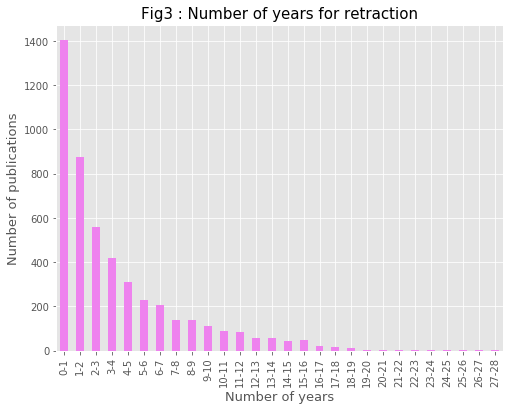

In [776]:
fig, ax= plt.subplots(figsize=(8,6))
plt.style.use('ggplot')
retract_dt.reset_index().plot(kind='bar', color='violet',ax=ax,legend=False, x='year_range',y='yr_after _calc')
plt.title('Fig3 : Number of years for retraction', fontsize=15)
plt.xlabel('Number of years', fontsize=13)
plt.ylabel('Number of publications', fontsize=13)

### Authors

In [110]:
retraction[retraction['authors']=='']['article'].count()

103

In [111]:
#retraction[retraction['authors']==' ']['article'].count()

In [112]:
#retraction['authors'].value_counts()

103 retracted papers have authors' names missing, suggesting they have been removed. 

In [113]:
retraction_aut=retraction.drop(retraction[retraction['authors']==''].index)
#retract_v=retract_v.drop(retract_v[retract['authors']==' '].index)
#retract_v=retract_v.drop(retract_v[retract_v['authors']=='   '].index)

In [114]:
retraction_aut[retraction_aut['authors'].isnull()]

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day


In [115]:
retraction_aut[retraction_aut['abbname']==' ']

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day


In [116]:
retraction_aut['authors']=retraction_aut['authors'].str.lower()
retraction_aut['abbname']=retraction_aut['abbname'].str.lower()
a=','.join(retraction_aut['authors'])
b=filter(lambda x: x, a.split(','))
c=Counter(b)
d=pd.Series(c)
e=d.sort_values(ascending=False)
e.head(10)

y fujii             116
h toyooka            91
h tanaka             77
j boldt              55
yoshitaka fujii      50
y saitoh             43
fazlul h sarkar      41
hyung-in moon        34
sanjeev banerjee     34
joachim boldt        33
dtype: int64

The above doesn't give the right answer regarding authors as y fujii and yoshitaka fujii coming twice for a same person's name. Therefore, the following steps were taken.

In [117]:
retraction_aut['authors']=retraction_aut['authors'].str.split(',')
retraction_aut['abbname']=retraction_aut['abbname'].str.split(',')
retraction_aut.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"[elizabeth rodier, zachary niday, klarita doci...",Molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019 Feb,Feb,,2018,Nov,30,"[e rodier, z niday, k doci, l wang, fj nan, zb...",2018-12-07,Dec,30,Nov,15
1,Retracted: Long Noncoding RNA SOX2OT Accelerat...,2018,11,28,"[li ma, xingzhen sun, wenxia kuai, jian hu, yu...",DNA and cell biology,"[Department of Pediatrics, The Affiliated Huai...",ATCC. www.lgcstandards-atcc.org/Products/All/C...,"FOXP4,SOX2OT,Wilms’ tumor,miR-363",2018,2018 Dec,Dec,21,2018,Nov,27,"[l ma, x sun, w kuai, j hu, y yuan, w feng, x lu]",2018-11-28,Nov,27,Nov,21


In [118]:
#retract_v[retract_v['article']== 'Some experience necessary']

In [119]:
abbname_=[]
author_=[]
for l,row in retraction_aut.iterrows():
    abb=row.abbname
   
    for author in row.authors:
        abbname_.append(abb)
        author_.append(''.join(author))
al=pd.DataFrame({'author':author_, 'abb':abbname_})

In [120]:
al.head()

,author,abb
0,elizabeth rodier,"[e rodier, z niday, k doci, l wang, fj nan, zb..."
1,zachary niday,"[e rodier, z niday, k doci, l wang, fj nan, zb..."
2,klarita doci,"[e rodier, z niday, k doci, l wang, fj nan, zb..."
3,lei wang,"[e rodier, z niday, k doci, l wang, fj nan, zb..."
4,fa-jun nan,"[e rodier, z niday, k doci, l wang, fj nan, zb..."


In [121]:
al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34077 entries, 0 to 34076
Data columns (total 2 columns):
author    34077 non-null object
abb       34077 non-null object
dtypes: object(2)
memory usage: 532.5+ KB


In [122]:
for l, row in al.iterrows():
    ab=row.author
    z=ab.split(' ')
   
    
    for x in row.abb:
    
        y=x.split(' ')
        
        if y[-1]==z[-1]:
            j= z[0]
                
            if len(y)>1 and len(z)>1:
                if len(y[0])==1:
                    
                    if j[0]==y[0]:
                        w=x
                    
                        break
                if len(y[0])>1:
                    k=y[0]
                    
                    if j[0]==k[0]:
                        w=x
                        break
            if len(y)>1 and len(z)==1:
                w=x
                break
       
    al.loc[l,'new']=w
al.head()

,author,abb,new
0,elizabeth rodier,"[e rodier, z niday, k doci, l wang, fj nan, zb...",e rodier
1,zachary niday,"[e rodier, z niday, k doci, l wang, fj nan, zb...",z niday
2,klarita doci,"[e rodier, z niday, k doci, l wang, fj nan, zb...",k doci
3,lei wang,"[e rodier, z niday, k doci, l wang, fj nan, zb...",l wang
4,fa-jun nan,"[e rodier, z niday, k doci, l wang, fj nan, zb...",fj nan


In [256]:
#al.head(41)

In [123]:
al.reset_index(drop=True, inplace=True)
'''lst1=[]
value='weijing feng'
x=al[al['author']=='weijing feng']
lst1.append(x['new'])
print(lst1)'''

"lst1=[]\nvalue='weijing feng'\nx=al[al['author']=='weijing feng']\nlst1.append(x['new'])\nprint(lst1)"

In [124]:
al.loc[al['author']=='weijing feng','new']

12    w feng
Name: new, dtype: object

In [125]:
auth_only=al[['author','new']]
auth_only.head()

,author,new
0,elizabeth rodier,e rodier
1,zachary niday,z niday
2,klarita doci,k doci
3,lei wang,l wang
4,fa-jun nan,fj nan


In [126]:
for l, row in auth_only.iterrows():
    aut=row.author
    x=aut.split(' ')
    y=x[:-1]
    auth_only.loc[l,'fn']= ' '.join (y)
auth_only.head()

,author,new,fn
0,elizabeth rodier,e rodier,elizabeth
1,zachary niday,z niday,zachary
2,klarita doci,k doci,klarita
3,lei wang,l wang,lei
4,fa-jun nan,fj nan,fa-jun


In [127]:
def func(fns):
    fns = set(fns)
    if len(fns) <= 2:
        return max(fns, key=len)
    
def make_name(row):
    if not row.author:
        return ''
    ln = row.author.rsplit(maxsplit=1)[-1]
    fn = row.fnx if not pd.isnull(row.fnx) else row.fn
    return '{} {}'.format(fn, ln)

auth_only['fnx']=auth_only.groupby('new')['fn'].transform(func)
auth_only['name'] = auth_only.apply(make_name, axis=1)

In [128]:
auth_only.head(2)

,author,new,fn,fnx,name
0,elizabeth rodier,e rodier,elizabeth,elizabeth,elizabeth rodier
1,zachary niday,z niday,zachary,zachary,zachary niday


In [129]:
#auth_only[auth_only['name']=='']

In [137]:
auth_only=auth_only.drop(auth_only[auth_only['name']==''].index)

In [138]:
auth_c=auth_only['name'].value_counts(ascending=False)

In [139]:
auth_c.head(10)

yoshitaka fujii     166
hidenori toyooka     97
joachim boldt        88
h tanaka             77
yuhji saitoh         46
fazlul h sarkar      41
shigeaki kato        36
huyng-in moon        35
jun iwamoto          35
sanjeev banerjee     34
Name: name, dtype: int64

In [155]:
auth_cts=pd.DataFrame({'num-retractions':auth_c})

In [156]:
auth_cts.head(3)

,num-retractions
yoshitaka fujii,166
hidenori toyooka,97
joachim boldt,88


In [157]:
auth_cts.count()

num-retractions    24722
dtype: int64

In [158]:
auth_cts.loc[(auth_cts['num-retractions']==1) , 'level']= '1'
auth_cts.loc[(auth_cts['num-retractions']>1) & (auth_cts['num-retractions']<=5), 'level']= '2-5'
auth_cts.loc[(auth_cts['num-retractions']>5) & (auth_cts['num-retractions']<=20), 'level']= '6-20'
auth_cts.loc[(auth_cts['num-retractions']>20) & (auth_cts['num-retractions']<=50), 'level']= '21-50'
auth_cts.loc[(auth_cts['num-retractions']>50) & (auth_cts['num-retractions']<=100), 'level']= '50-100'
auth_cts.loc[(auth_cts['num-retractions']>100) , 'level']= '101-above'

In [159]:
auth_cts.head(3)

,num-retractions,level
yoshitaka fujii,166,101-above
hidenori toyooka,97,50-100
joachim boldt,88,50-100


In [149]:
#numsort={'1':1,'2-5':2,'6-20':3,'21-50':4,'50-100':5,'101-above':6}

In [150]:
#auth_cts['num']=auth_cts['level'].apply(lambda x: numsort[x])

In [161]:
auth_cts['level'].value_counts().sort_values(ascending=False)

1            20447
2-5           3908
6-20           345
21-50           18
50-100           3
101-above        1
Name: level, dtype: int64

Text(0.5,1,'Number of retractions per author')

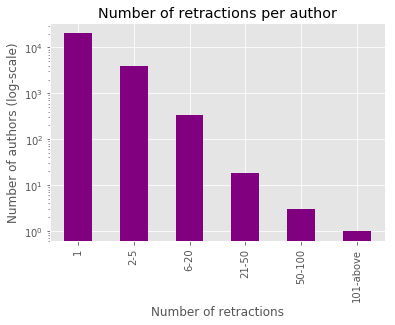

In [162]:
auth_cts['level'].value_counts().sort_values(ascending=False).plot(kind='bar',color='purple')
plt.yscale('log')
plt.xlabel('Number of retractions')
plt.ylabel('Number of authors (log-scale)')
plt.title('Number of retractions per author')

In [163]:
authors=auth_cts.groupby('level').count()

In [170]:
authors.sort_values(by='num-retractions',ascending=False)

,num-retractions
level,
1,20447
2-5,3908
6-20,345
21-50,18
50-100,3
101-above,1


In [171]:
tot_auth=np.sum(authors['num-retractions'])

In [172]:
tot_auth

24722

In [174]:
perc_auth=100*authors['num-retractions']/tot_auth

In [176]:
perc_auth.sort_values()

level
101-above     0.004045
50-100        0.012135
21-50         0.072810
6-20          1.395518
2-5          15.807783
1            82.707710
Name: num-retractions, dtype: float64

Text(0.5,1,'Distribution of retractions within groups')

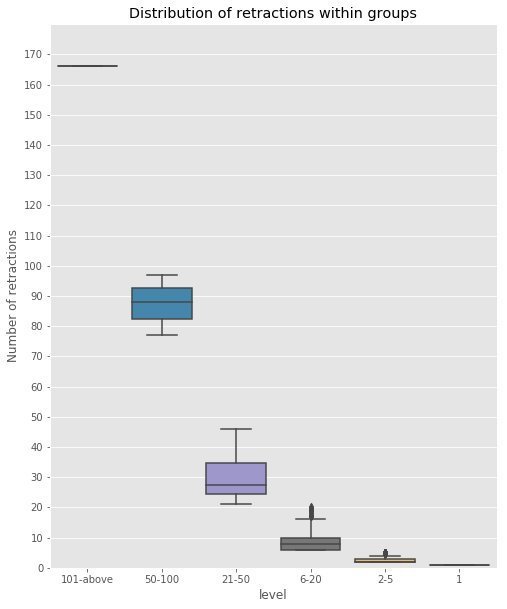

In [177]:
fig,ax=plt.subplots(figsize=(8,10))
sns.boxplot(y='num-retractions', x='level', data=auth_cts, ax=ax)
plt.ylim(0,180)
plt.yticks(np.arange(0,180,10))
plt.ylabel('Number of retractions')
plt.title('Distribution of retractions within groups')

In [178]:
auth_cts[auth_cts['level']=='2-5'].describe()

,num-retractions
count,3908.000000
mean,2.468014
std,0.827447
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,5.000000


In [179]:
auth_cts[auth_cts['level']=='6-20'].describe()

,num-retractions
count,345.000000
mean,8.657971
std,3.166706
min,6.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,20.000000


In [180]:
auth_cts[auth_cts['level']=='21-50'].describe()

,num-retractions
count,18.000000
mean,29.666667
std,6.885620
min,21.000000
25%,24.500000
50%,27.500000
75%,34.750000
max,46.000000


In [181]:
auth_cts[auth_cts['level']=='50-100'].describe()

,num-retractions
count,3.000000
mean,87.333333
std,10.016653
min,77.000000
25%,82.500000
50%,88.000000
75%,92.500000
max,97.000000


### Countries

In [11]:
### how I obtained the publishing countries list is explained in detail in the file 'Countries', 515 missing data

In [ ]:
handle= open('countries_alt_names.txt','r')
handle2=open('countries_list.txt','r')

#get a dictionary of countries and their alternate names
alt_countries_name_dict = {}
for line in handle:
    names = [name.strip() for name in line.split(';')]
    canonical = names[0]
    alt_countries_name_dict.update({name.lower(): canonical for name in names})
#made all key lower because of ease of matching in frther processing

#get a list of countries
countries_lst=[]
for name in handle2:
    countries_lst.append(name.strip())

#get a list of countries that are missing in the dictionary made above
new_names=[]
for country in countries_lst:
    if country in alt_countries_name_dict:
        continue
    else:
        new_names.append(country)
    
uni=pd.read_csv('universities2.csv')
uni=uni.drop('Unnamed: 0', axis=1)
uni['universityLabel']=uni['universityLabel'].str.lower()

uni['countryLabel']=uni['countryLabel'].str.replace("'s " , "s ")


# diff orientation of university word in the name can have an effect. this func overcomes that
def univ_orientation(name):
    if 'university' in name:
        y=name.split('university')
        if y[1]=='':
            z='university of '+y[0]
            if uni['universityLabel'].str.contains(z).any() :
                x=uni.loc[uni['universityLabel'].str.contains(z),'countryLabel' ]
                return x.iloc[0]
    
        if y[0]=='':
            if 'of' in y[1]:
                w=y[1].replace('of','')
                w=w.strip()
                v= w + ' university'
                #print('v',v)
                if uni['universityLabel'].str.contains(v).any() :
                    x=uni.loc[uni['universityLabel'].str.contains(v),'countryLabel' ]
                    #print('#', x.iloc[0])
                    if x.iloc[0] is not None:
                        return x.iloc[0]
                        
                else:
                    l=y[1].strip()
                    k=l+' university'
                    if uni['universityLabel'].str.contains(k).any() :
                        x=uni.loc[uni['universityLabel'].str.contains(k),'countryLabel' ]
                        if x.iloc[0] is not None:
                            return x.iloc[0]
                    


def return_country(name):
    if name==' ':
        pass
    if uni['universityLabel'].str.contains(name).any() :
        x=uni.loc[uni['universityLabel'].str.contains(name),'countryLabel' ]
        return x.iloc[0]
    else:
        if '-' in name:
            k=name.split('-')
            for name in k:
                name=name.strip()
                if uni['universityLabel'].str.contains(name).any() :
                    x=uni.loc[uni['universityLabel'].str.contains(name),'countryLabel' ]
                    
                    if x.iloc[0] is not None:
                        return x.iloc[0]
                        break
                else:
                    univ_orientation(name)

    
        if 'university' in name:
            univ_orientation(name)
            
        else:
            pass


def get_country(name):
    
    if name in alt_countries_name_dict:
        return alt_countries_name_dict[name]
    else:
        pass

def trash_after_dot(item):
    lst_i=item.split('.')
    z=lst_i[0]
    return (z)

def return_useful_split(i):
    if i[0]=='':
        return i[1].strip()
    else:
        return i[0].strip()

def brackets_remove(i):
    a=i.rsplit('(',maxsplit=1)
    b=a[1].split(')',maxsplit=1)
    c= a[0]+b[1]
    return c
abb_country_lst=['u.s.a.', 'u.k.', 'u.a.e.','u.s.']
instt_lst=['school of medicine','cancer center', 'college of medicine', 'medical center']

def multiple_returns(i):
    if ',' in i:
        if '(' in i and ')' in i:
            i=brackets_remove(i)
            
        i=i.split(',')
        
        lstc=[]
        for item in i:
            item=item.strip(' ')
            lstc.append(item)
        
        if '' in lstc :
            lstc.remove('')
        
        for item in lstc:
            if 'phone' in item or 'fax' in item:
                lstc.remove(item)
            
        for i in lstc[::-1]:
            if 'department' not in i  :
                print('+',i)
                if i.isdigit():
                    break
                if i not in abb_country_lst :
                    if '.' in i :
                        i=trash_after_dot(i) 
                        i=i.strip()
                if i in instt_lst:
                    break            
                if 'university' in i:
                    if 'school of medicine' in i:
                        i=i.split('school of medicine')
                        i=return_useful_split(i)
                    
                    if 'medical center' in i:
                        i=i.split('medical center')
                        i=return_useful_split(i)
                        
                    if 'affiliated hospital of' in i:
                        i=i.split('affiliated hospital of')
                        i=return_useful_split(i)
                        
                
                key=i
                
                z=get_country(key)
                y=return_country(key)
                if z is not None or y is not None:
                    if z is not None:
                        comp.append(z)
                        break
                    if y is not None:
                        y=y.lower()
                        a=get_country(y)
                        comp.append(a)
                        break
                if z is None and y is None:        
                    if 'university' in i and '-' in i:
                        i=i.split('-', maxsplit=1)
                        
                        key=i[0]
                        key=key.strip()
                        y=return_country(str(key))
                        
                        if y is not None:
                            a=y.lower()
                            z=get_country(a)
                            comp.append(z)
                            break
                            
                        if y is None:
                            z=get_country(str(key)) 
                        if z is not None:
                            comp.append(z) 
                            break
                        else: 
                            o=key.split(' ')
                            key=' '.join(o[:-1])
                            key=key.strip()
                            f=return_country(str(key))
                            if f is not None:
                                a=f.lower()
                                z=get_country(a)
                                comp.append(z)


#lstj=[ ['School of Life Sciences, Tsinghua-Peking Joint Center for Life Sciences, Beijing Advanced Innovation Center for Structural Biology, Tsinghua University, Beijing, China.', 'School of Life Sciences, Tsinghua-Peking Joint Center for Life Sciences, Beijing Advanced Innovation Center for Structural Biology, Tsinghua University, Beijing, China '], ['Center for Quantitative Genetics and Genomics, Department of Molecular Biology and Genetics, Aarhus University, 8830, Tjele, Denmark. ', 'Center for Quantitative Genetics and Genomics, Department of Molecular Biology and Genetics, Aarhus University, 8830, Tjele, Denmark.', 'Center for Quantitative Genetics and Genomics, Department of Molecular Biology and Genetics, Aarhus University, 8830, Tjele, Denmark.', 'Center for Quantitative Genetics and Genomics, Department of Molecular Biology and Genetics, Aarhus University, 8830, Tjele, Denmark.']]
big_list=[]
big_set=[]
import string
import re
for component in lstz[:10]:
    comp=[]
    
    for i in component:
        i=i.lower()
        print('i',i)
        if ',' not in i and 'department' not in i:
            if i.isdigit():
                break
            if i =='':
                continue        
            if '(' in i and ')' in i:
                i=brackets_remove(i)

            i=i.replace('.','')
            i=i.replace(';','')

            if 'university' in i:
                if 'school of medicine' in i:
                    i=i.split('school of medicine')
                    i=return_useful_split(i)
                if 'medical center' in i:
                    i=i.split('medical center')
                    i=return_useful_split(i)
                if 'affiliated hospital of' in i:
                    i=i.split('affiliated hospital of')
                    i=return_useful_split(i)
            key=i
            z=get_country(key)
            y=return_country(key)
            if z is not None or y is not None:
                if z is not None:
                    comp.append(z)
                    continue
                if y is not None:
                    y=y.lower()
                    a=get_country(y)
                    comp.append(a)
                    continue
            if z is None and y is None:        
                if 'university' in i and '-' in i:
                    i=i.split('-', maxsplit=1)
                    key=i[0]
                    key=key.strip()
                    y=return_country(str(key))
                    if y is not None:
                        a=y.lower()
                        z=get_country(a)
                        comp.append(z)
                        break
                    if y is None:
                        z=get_country(str(key)) 
                        if z is not None:
                            comp.append(z) 
                            break
                        else: 
                            o=key.split(' ')
                            key=' '.join(o[:-1])
                            key=key.strip()
                            f=return_country(str(key))
                            if f is not None:
                                a=f.lower()
                                z=get_country(a)
                                comp.append(z)

                    
        if ',' in i:
            lsti=[]
            # a researcher can have multiple affiliations that are usually sep by ; 
            if ';' in i:
                lsti=i.split(';')
                for i in lsti:
                    multiple_returns(i)
            else:
                multiple_returns(i)
    print(comp)
    comp = [c for c in comp if c]
    if comp is not None:        
        big_list.append(comp)
    else:
        big_list.append('')
#the result was then stored as lst2_publishing_countries.json

In [269]:
with open ('lst2_publishing_countries.json','r') as f:
    pub_countries=json.load(f)


big_set=[] 
for item in pub_countries:
    new_item=set(item)
    new_str=','.join(list(new_item))
    big_set.append(new_str)
    
joined_list=','.join(big_set)
get_split_parts=joined_list.split(',')


In [270]:
#gives a series of countries with retractions and the number of retractions for each
dicti=Counter(get_split_parts)
p=pd.Series(dicti)
k=p.drop(index='')
mixed=k.sort_values(ascending=False)
mixed

United States               1567
China                       1194
Japan                        549
India                        400
Germany                      314
United Kingdom               220
South Korea                  209
Italy                        178
Iran                         177
Canada                       122
Spain                        102
France                        96
Australia                     82
Netherlands                   78
Turkey                        72
Brazil                        66
Sweden                        65
Taiwan                        58
Switzerland                   54
Egypt                         51
Singapore                     46
Saudi Arabia                  40
Israel                        39
Greece                        33
Poland                        32
Ireland                       29
Malaysia                      27
Thailand                      27
Pakistan                      26
Norway                        23
Belgium   

Text(0.5,1,'Fig 5: Top 20 countries with retracted papers ')

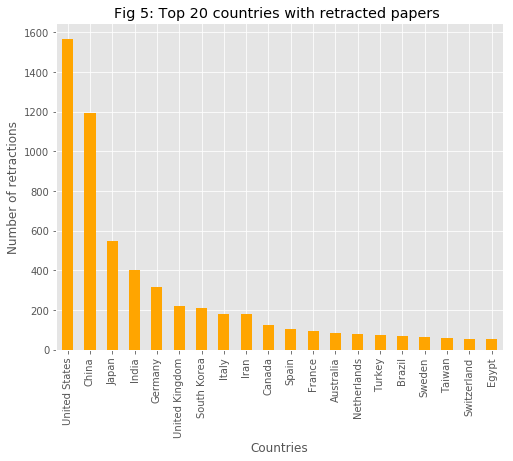

In [271]:
# corresponding graph of top 20 countries with retractions
fig,ax=plt.subplots(figsize=(8,6))
x1=mixed.head(20)
x1.plot(kind='bar', color='orange')
plt.xlabel('Countries')
plt.ylabel('Number of retractions')
plt.title('Fig 5: Top 20 countries with retracted papers ')

In [272]:
#making a dataframe of the above series
multiple=pd.DataFrame({'mixed':mixed})

In [273]:
multiple.head(2)

,mixed
United States,1567
China,1194


In [274]:
multiple.count()

mixed    98
dtype: int64

In [275]:
# making a series of countries that published alone (no collaboration) 
#and their respective number of retractions
big_set2=[]
for item in big_set:
    if ',' not in item:
        big_set2.append(item)
    else:
        continue
joined_list=','.join(big_set2)
get_split_parts=joined_list.split(',')

dicti=Counter(get_split_parts)
p=pd.Series(dicti)
k=p.drop(index='')
singles=k.sort_values(ascending=False)

In [276]:
singles

United States           1416
China                   1099
Japan                    529
India                    380
Germany                  288
South Korea              196
United Kingdom           183
Iran                     163
Italy                    153
Canada                   107
Spain                     84
Australia                 70
France                    69
Turkey                    69
Netherlands               67
Brazil                    62
Sweden                    49
Taiwan                    49
Egypt                     43
Switzerland               37
Israel                    37
Singapore                 35
Greece                    31
Saudi Arabia              31
Poland                    28
Thailand                  24
Ireland                   24
Belgium                   18
Czech Republic            18
Malaysia                  17
Pakistan                  17
Denmark                   16
Norway                    14
Finland                   13
South Africa  

Text(0.5,1,'Top 20 countries with retracted papers ')

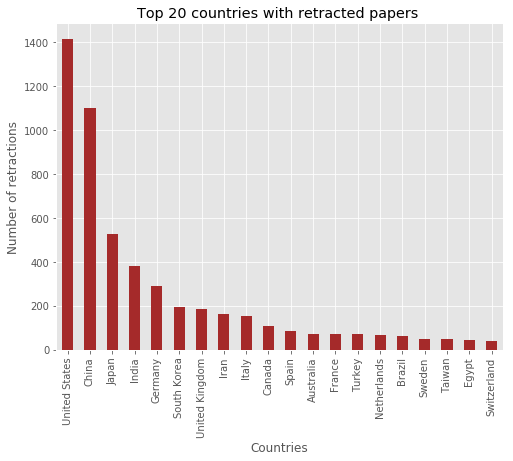

In [277]:
# number of papers retracted for countries without international collabaorations
fig,ax=plt.subplots(figsize=(8,6))
x2=singles.head(20)
x2.plot(kind='bar', color='brown')
plt.xlabel('Countries')
plt.ylabel('Number of retractions')
plt.title('Top 20 countries with retracted papers ')

In [278]:
# making a dataframe for non-international, single country retractions
single=pd.DataFrame({'singles':singles})

In [279]:
single.head(2)

,singles
United States,1416
China,1099


In [280]:
# combining the two dataframes, for downstream processing
mix=pd.merge(single,multiple,left_index=True, right_index=True)

In [281]:
mix.index.name='country_name'

In [282]:
mix.head(2)

,singles,mixed
country_name,,
United States,1416,1567
China,1099,1194


In [283]:
mix['multiples']=mix['mixed'].subtract(mix['singles'])

In [284]:
mix['ratio']=mix['multiples'].divide(mix['mixed'])
mix['perc']=mix['ratio']*100

In [285]:
mix1=mix.sort_values(by='mixed',ascending=False).head(5)

In [286]:
mix1

,singles,mixed,multiples,ratio,perc
country_name,,,,,
United States,1416,1567,151,0.096362,9.636248
China,1099,1194,95,0.079564,7.956449
Japan,529,549,20,0.036430,3.642987
India,380,400,20,0.050000,5.000000
Germany,288,314,26,0.082803,8.280255


In [287]:
mix1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, United States to Germany
Data columns (total 5 columns):
singles      5 non-null int64
mixed        5 non-null int64
multiples    5 non-null int64
ratio        5 non-null float64
perc         5 non-null float64
dtypes: float64(2), int64(3)
memory usage: 240.0+ bytes


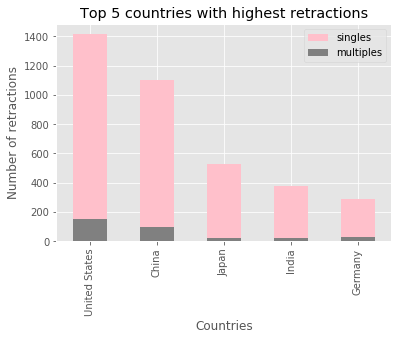

In [288]:
ax=mix1.reset_index().plot(y='singles',kind='bar',x='country_name',color='pink')
mix1.reset_index().plot(y='multiples',kind='bar',ax=ax,x='country_name',color='grey')
plt.ylabel('Number of retractions')
plt.xlabel('Countries')
plt.title('Top 5 countries with highest retractions')
plt.show()

In [289]:
country_year_df=pd.DataFrame({'big_set':big_set,'pub_year':pubyear,'journal':journal})

In [290]:
country_year_df.head(2)

,big_set,pub_year,journal
0,"China,United States",2018,Molecular pharmacology
1,China,2018,DNA and cell biology


In [291]:
country_year_df.shape[0]

6485

In [292]:
country_year_df['pub_year'].value_counts()

2014    549
2015    506
2012    463
2013    422
2011    410
2010    384
2009    363
2008    342
2016    337
2007    298
2006    290
2005    241
2017    222
None    203
2004    195
2003    154
2002    138
2001    132
2018    113
2000    101
1999     84
1998     73
1997     50
1996     45
1995     45
1994     45
1990     39
1991     32
1989     28
1992     28
1993     22
1981     16
1988     13
1985     13
1980     12
1987     11
1984     11
1983     10
1986      9
1979      8
1978      8
1982      5
1975      5
1976      3
1973      3
1968      1
1977      1
1959      1
1963      1
Name: pub_year, dtype: int64

In [293]:
country_year_df[country_year_df['pub_year']=='None'].count()

big_set     203
pub_year    203
journal     203
dtype: int64

In [294]:
country_year_df2=country_year_df[country_year_df['big_set']!='']

In [295]:
country_year_df2.shape[0]

5970

In [296]:
#country_year_df2['big_set'].value_counts()

In [297]:
country_year_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 6479
Data columns (total 3 columns):
big_set     5970 non-null object
pub_year    5970 non-null object
journal     5970 non-null object
dtypes: object(3)
memory usage: 186.6+ KB


In [298]:
country_year_df2['big_set']=country_year_df2['big_set'].astype(str)

In [299]:
country_year_df2['big_set'] = country_year_df2['big_set'].str.split(',')
#country_year_df2['big_set_len']=country_year_df2['big_set'].apply(len)
country_year_df2['big_set'].head(2)

0    [China, United States]
1                   [China]
Name: big_set, dtype: object

In [300]:
country_year_df2['big_set_len']=country_year_df2['big_set'].apply(len)

In [301]:
country_year_df2.head(2)

,big_set,pub_year,journal,big_set_len
0,"[China, United States]",2018,Molecular pharmacology,2
1,[China],2018,DNA and cell biology,1


In [302]:
country_year_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 6479
Data columns (total 4 columns):
big_set        5970 non-null object
pub_year       5970 non-null object
journal        5970 non-null object
big_set_len    5970 non-null int64
dtypes: int64(1), object(3)
memory usage: 233.2+ KB


In [303]:
#making a new dataframe where list of countries is split 
#and takes away the other components for diff columns for each
country_=[]
year_=[]
journal_=[]
for _, row in country_year_df2.iterrows():
    yr=row.pub_year
    jour=row.journal
    for big in row.big_set:
        country_.append(big)
        year_.append(yr)
        journal_.append(jour)

In [304]:
country_year_2=pd.DataFrame({'country':country_,'year':year_,'journal':journal_})

In [305]:
country_year_2.head(2)

,country,year,journal
0,China,2018,Molecular pharmacology
1,United States,2018,Molecular pharmacology


In [306]:
country_year_2.groupby('country')['year'].count().sort_values(ascending=False)

country
United States               1567
China                       1194
Japan                        549
India                        400
Germany                      314
United Kingdom               220
South Korea                  209
Italy                        178
Iran                         177
Canada                       122
Spain                        102
France                        96
Australia                     82
Netherlands                   78
Turkey                        72
Brazil                        66
Sweden                        65
Taiwan                        58
Switzerland                   54
Egypt                         51
Singapore                     46
Saudi Arabia                  40
Israel                        39
Greece                        33
Poland                        32
Ireland                       29
Thailand                      27
Malaysia                      27
Pakistan                      26
Belgium                       23
No

In [307]:
country_year_3=country_year_2[country_year_2['year']!='None']

In [308]:
china=country_year_3[(country_year_3['country']=='China')]

In [309]:
usa=country_year_3[(country_year_3['country']=='United States')]
japan=country_year_3[(country_year_3['country']=='Japan')]
india=country_year_3[(country_year_3['country']=='India')]
germany=country_year_3[(country_year_3['country']=='Germany')]

Text(0.5,1,'Fig 6: Retraction trend for the top five countries with highest retractions')

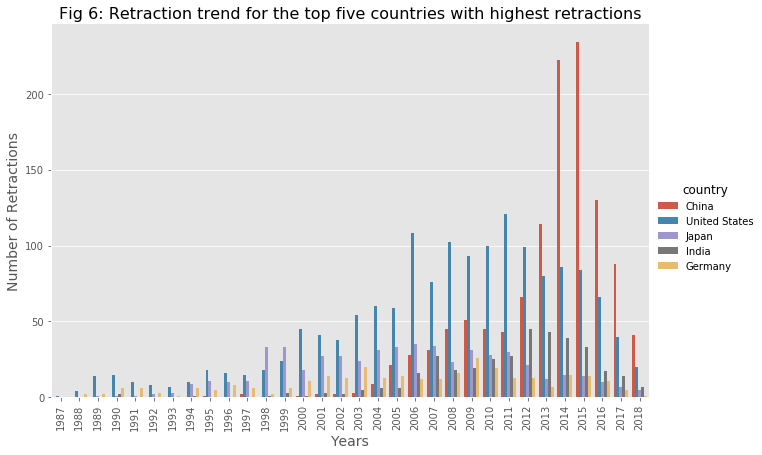

In [310]:
sns.catplot('year',data=pd.concat([china,usa,japan,india,germany]),hue='country',kind='count', height=6, aspect=3/2)
plt.xticks(rotation=90)
plt.ylabel('Number of Retractions',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.title('Fig 6: Retraction trend for the top five countries with highest retractions', fontsize=16)

In [464]:
china_pub=pd.read_csv('china-pub.csv')

In [465]:
china_pub.head(2)

,year,number
0,2019,40367
1,2018,182986


In [468]:
#retract_y.drop(retract_y[retract_y['retraction_year']=='2019'].index)
china_pub=china_pub.sort_values(by='year',ascending=True)
china_pub2=china_pub.drop(china_pub[china_pub['year']== 2019].index)
china_pub2['year'].unique()

array([1890, 1901, 1908, 1917, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1940, 1941, 1942, 1944, 1945, 1946, 1947, 1949, 1956, 1959,
       1966, 1967, 1968, 1969, 1970, 1971, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

Text(0.5,0,'Years')

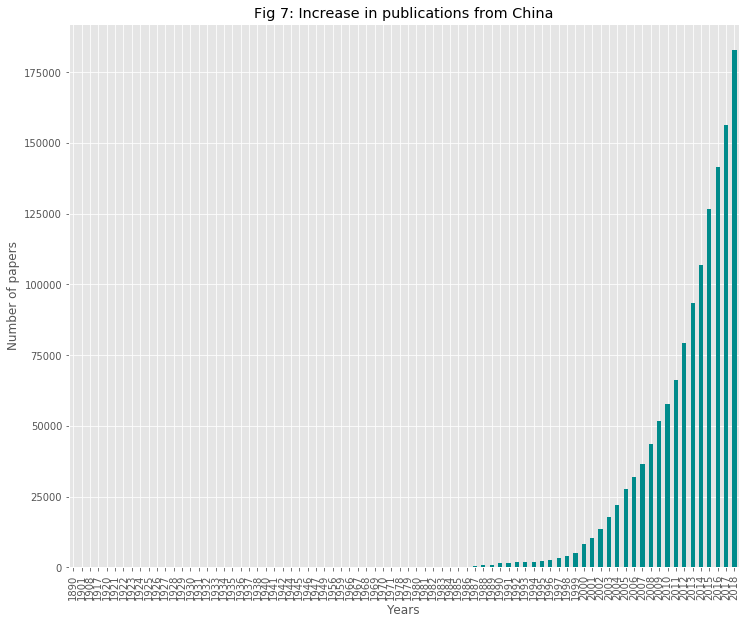

In [469]:
fig,ax=plt.subplots(figsize=(12,10))
china_pub2.plot(x='year', y='number',kind='bar',ax=ax,legend=False,color='darkcyan')
plt.title('Fig 7: Increase in publications from China')
plt.ylabel('Number of papers')
plt.xlabel('Years')

In [315]:
# retraction of papers in diff journals for papers published in China
china['journal'].value_counts().head()

Tumour biology : the journal of the International Society for Oncodevelopmental Biology and Medicine    123
PloS one                                                                                                 43
Molecular biology reports                                                                                30
Genetics and molecular research : GMR                                                                    20
Acta crystallographica. Section E, Structure reports online                                              17
Name: journal, dtype: int64

In [316]:
china['journal'].nunique()

505

In [317]:
one_country=country_year_df2[country_year_df2['big_set_len']==1]
multiple_countries=country_year_df2[country_year_df2['big_set_len']>1]

In [318]:
one_country.rename(columns={'big_set_len':'num_countries'},inplace=True)

In [319]:
one_country.head(2)

,big_set,pub_year,journal,num_countries
1,[China],2018,DNA and cell biology,1
2,[Germany],2018,Journal of functional biomaterials,1


In [320]:
one_country.count()

big_set          5663
pub_year         5663
journal          5663
num_countries    5663
dtype: int64

In [321]:
one_country['big_set_len']='1'

In [322]:
one_country=one_country[one_country['pub_year']!='None']
multiple_countries=multiple_countries[multiple_countries['pub_year']!='None']

In [323]:
multiple_countries.head(2)

,big_set,pub_year,journal,big_set_len
0,"[China, United States]",2018,Molecular pharmacology,2
8,"[Australia, Sweden]",2018,Biotechnology for biofuels,2


In [324]:
multiple_countries['big_set_len']='2 or more'

In [325]:
multiple_countries.rename(columns={'big_set_len':'num_countries'},inplace=True)

In [326]:
multiple_countries.head(2)

,big_set,pub_year,journal,num_countries
0,"[China, United States]",2018,Molecular pharmacology,2 or more
8,"[Australia, Sweden]",2018,Biotechnology for biofuels,2 or more


In [327]:
multiple_countries.count()

big_set          301
pub_year         301
journal          301
num_countries    301
dtype: int64

Text(12.2829,0.5,'Number of retractions')

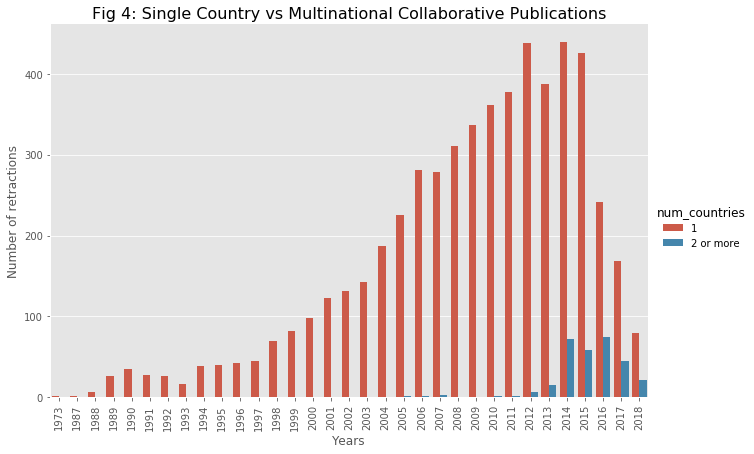

In [333]:
sns.catplot(data=pd.concat([one_country,multiple_countries]), kind='count',x='pub_year',hue='num_countries',height=6,aspect=3/2)
plt.xticks(rotation=90)
plt.title('Fig 4: Single Country vs Multinational Collaborative Publications', fontsize=16)
plt.xlabel('Years')
plt.ylabel('Number of retractions')

In [334]:
# making a dataframe for country-wise publication record and retraction rate
core=pd.read_csv('countries-retractions.csv')

In [335]:
core.drop('Unnamed: 4',axis=1,inplace=True)

In [336]:
core.head(2)

,Country-Name,Number-Retractions,No-publications,ratio
0,United States,1567,4374554,0.000358
1,China,1194,1342002,0.000890


In [337]:
core.sort_values(by='ratio',ascending=False).head(20)

,Country-Name,Number-Retractions,No-publications,ratio
88,Anguilla,1,53,0.018868
96,Aruba,1,111,0.009009
77,San Marino,1,124,0.008065
90,Central African Republic,1,240,0.004167
58,Gabon,5,1357,0.003685
73,Kosovo,2,698,0.002865
82,El Salvador,1,390,0.002564
94,Barbados,1,674,0.001484
8,Iran,177,132781,0.001333
48,Nepal,9,7599,0.001184


In [338]:
core['thousand']=core['ratio']*10000

In [339]:
core_threshold=core[core['No-publications']>10000]

In [340]:
core_threshold_1=core_threshold.sort_values(by='ratio', ascending=False).head(20)

In [341]:
core_threshold_1

,Country-Name,Number-Retractions,No-publications,ratio,thousand
8,Iran,177,132781,0.001333,13.33022
35,Tunisia,16,14710,0.001088,10.87695
3,India,400,419733,0.000953,9.52987
41,Ukraine,12,12727,0.000943,9.42877
1,China,1194,1342002,0.000890,8.89716
19,Egypt,51,57448,0.000888,8.87759
28,Pakistan,26,32294,0.000805,8.05103
49,Bangladesh,8,11150,0.000717,7.17489
21,Saudi Arabia,40,58417,0.000685,6.84732
52,United Arab Emirates,7,10236,0.000684,6.83861


Text(0.5,1,'Fig 8: Retraction rate per 10000 for 20 top countries with highest retraction rates')

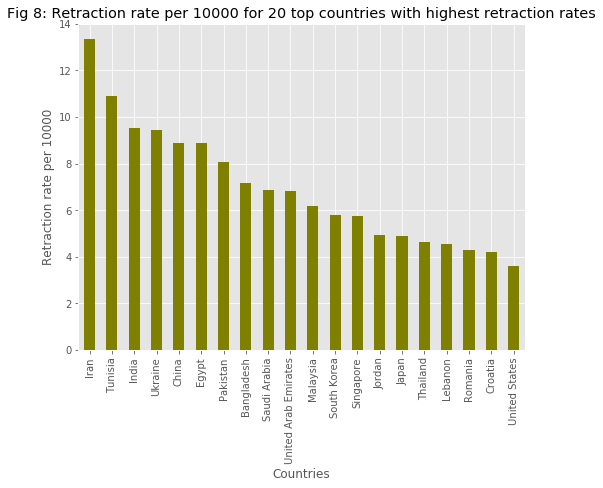

In [344]:
fig,ax=plt.subplots(figsize=(8,6))
#sns.catplot(data=core_threshold_1,x='Country-Name',y='thousand', kind='bar', color='olive',ax=ax)
core_threshold_1.plot(x='Country-Name',y='thousand', kind='bar', color='olive',ax=ax,legend=False)
plt.xticks(rotation=90)
plt.ylabel('Retraction rate per 10000')
plt.xlabel('Countries')
plt.title('Fig 8: Retraction rate per 10000 for 20 top countries with highest retraction rates')

In [345]:
new_core=pd.merge(core,single, left_on='Country-Name', right_index=True)

In [346]:
new_core.head(2)

,Country-Name,Number-Retractions,No-publications,ratio,thousand,singles
0,United States,1567,4374554,0.000358,3.58208,1416
1,China,1194,1342002,0.000890,8.89716,1099


In [347]:
new_core['singles_ratio']=new_core['singles'].divide(new_core['No-publications'])

In [348]:
new_core.sort_values(by='ratio',ascending=False).head(30)

,Country-Name,Number-Retractions,No-publications,ratio,thousand,singles,singles_ratio
77,San Marino,1,124,0.008065,80.64516,1,0.008065
58,Gabon,5,1357,0.003685,36.84598,5,0.003685
73,Kosovo,2,698,0.002865,28.65330,2,0.002865
82,El Salvador,1,390,0.002564,25.64103,1,0.002564
8,Iran,177,132781,0.001333,13.33022,163,0.001228
48,Nepal,9,7599,0.001184,11.84366,4,0.000526
47,Morocco,9,7851,0.001146,11.46351,9,0.001146
66,Kazakhstan,2,1800,0.001111,11.11111,1,0.000556
35,Tunisia,16,14710,0.001088,10.87695,13,0.000884
3,India,400,419733,0.000953,9.52987,380,0.000905


In [349]:
new_core.sort_values(by='singles_ratio',ascending=False).head(20)

,Country-Name,Number-Retractions,No-publications,ratio,thousand,singles,singles_ratio
77,San Marino,1,124,0.008065,80.64516,1,0.008065
58,Gabon,5,1357,0.003685,36.84598,5,0.003685
73,Kosovo,2,698,0.002865,28.65330,2,0.002865
82,El Salvador,1,390,0.002564,25.64103,1,0.002564
8,Iran,177,132781,0.001333,13.33022,163,0.001228
47,Morocco,9,7851,0.001146,11.46351,9,0.001146
79,Togo,1,1055,0.000948,9.47867,1,0.000948
3,India,400,419733,0.000953,9.52987,380,0.000905
35,Tunisia,16,14710,0.001088,10.87695,13,0.000884
1,China,1194,1342002,0.000890,8.89716,1099,0.000819


### Journals

In [350]:
# total number of journals with retractions
retraction['journal'].nunique()

1988

In [351]:
ret_j=retraction['journal'].replace('Science (New York, N.Y.)','Science')
ret_j=ret_j.str.replace('The Journal of biological chemistry','J. Biol Chem')
ret_j=ret_j.str.replace('Tumour biology : the journal of the International Society for Oncodevelopmental Biology and Medicine','Tumour Biology')
ret_j=ret_j.str.replace('Proceedings of the National Academy of Sciences of the United States of America','Proc Natl Acad Sci')

ret_j=ret_j.replace('Journal of immunology (Baltimore, Md. : 1950)','J. Immunol.')
ret_j=ret_j.str.replace("Canadian journal of anaesthesia = Journal canadien d'anesthesie",'Canadian journal of anaesthesia')
ret_j=ret_j.str.replace('Acta crystallographica. Section E, Structure reports online','Acta Crystal. Sect. E Str Rep')
ret_j=ret_j.str.replace('The Journal of clinical investigation','J. of clinical investigation')
ret_j=ret_j.str.replace('Biochemical and biophysical research communications','Biochem Biophy Res Commun')
ret_j=ret_j.str.replace('British journal of anaesthesia','Br J Anaesth')

In [352]:
ret_j.head()

0                    Molecular pharmacology
1                      DNA and cell biology
2        Journal of functional biomaterials
3             Infection and drug resistance
4    Journal of clinical psychopharmacology
Name: journal, dtype: object

In [353]:
ret_j.value_counts().sort_values(ascending=False).head(20)

J. Biol Chem                       253
Tumour Biology                     145
PloS one                           132
Proc Natl Acad Sci                 106
Science                             89
Nature                              72
Anesthesia and analgesia            65
Cancer research                     56
J. Immunol.                         50
Obstetrics and gynecology           40
Cell                                39
Blood                               39
Canadian journal of anaesthesia     39
Acta Crystal. Sect. E Str Rep       39
J. of clinical investigation        39
Diagnostic pathology                38
Biochem Biophy Res Commun           34
Molecular and cellular biology      33
Molecular biology reports           31
Br J Anaesth                        30
Name: journal, dtype: int64

Text(0.5,1,'Fig 9: Twenty journals with maximum retractions')

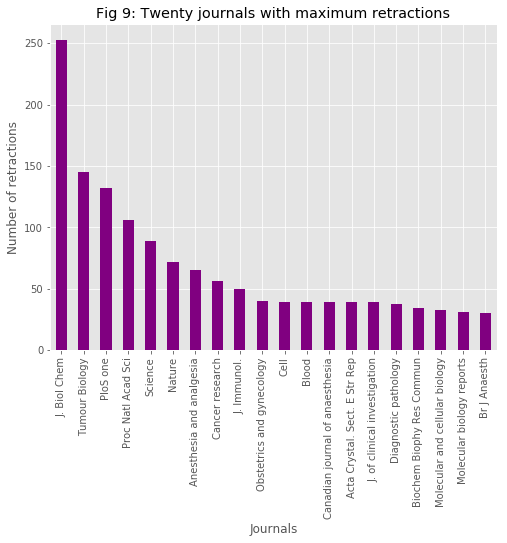

In [354]:
fig,ax=plt.subplots(figsize=(8,6))
ret_j.value_counts().sort_values(ascending=False).head(20).plot(kind='bar', color='purple')
plt.ylabel('Number of retractions')
plt.xlabel('Journals')
plt.title('Fig 9: Twenty journals with maximum retractions')

In [355]:
# making separate dataframes for different journals, which is needed for downstream analysis
J_Biol_Chem=retraction.loc[retraction['journal']=='The Journal of biological chemistry',:]
Tumour_Biology=retraction.loc[retraction['journal']=='Tumour biology : the journal of the International Society for Oncodevelopmental Biology and Medicine',:]
Plos_one=retraction.loc[retraction['journal']=='PloS one',:]
Proc_Natl_Acad_Sci=retraction.loc[retraction['journal']=='Proceedings of the National Academy of Sciences of the United States of America',:]
Science=retraction.loc[retraction['journal']=='Science (New York, N.Y.)',:]
Nature=retraction.loc[retraction['journal']=='Nature',:]
Anesthesia_and_analgesia=retraction.loc[retraction['journal']=='Anesthesia and analgesia',:]
Cancer_research=retraction.loc[retraction['journal']=='Cancer research',:]
J_Immunol=retraction.loc[retraction['journal']=='Journal of immunology (Baltimore, Md. : 1950)',:]
Obstetrics_and_gynecology=retraction.loc[retraction['journal']=='Obstetrics and gynecology',:] 

Text(0.5,0.98,'Number of retractions per year for the top ten journals in the retraction category')

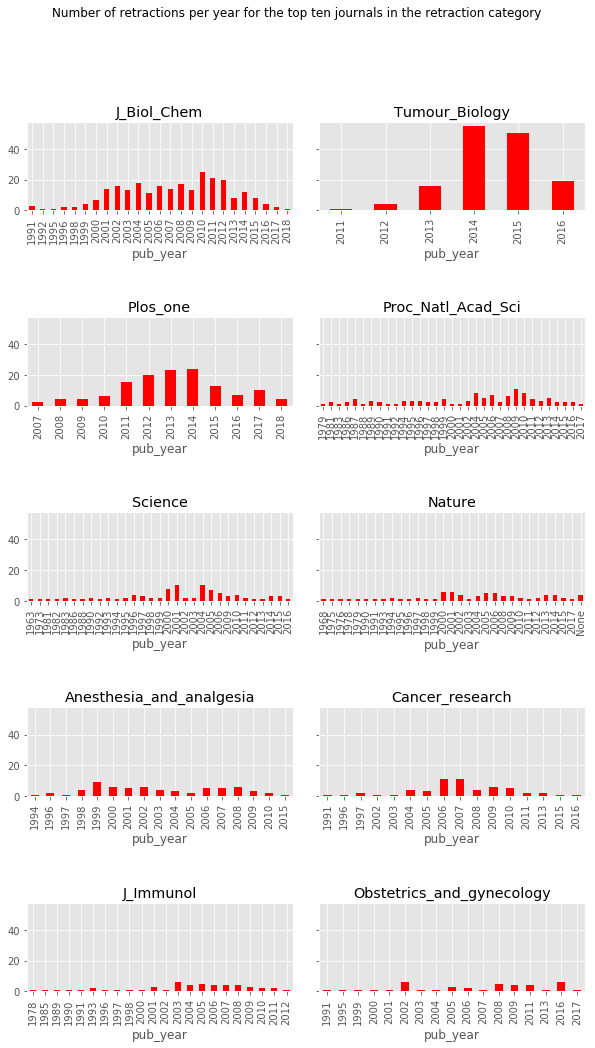

In [356]:
# checking the distribution of retractions in top 10 journals based on the publication year
df_lst=['J_Biol_Chem','Tumour_Biology','Plos_one','Proc_Natl_Acad_Sci','Science','Nature','Anesthesia_and_analgesia','Cancer_research','J_Immunol','Obstetrics_and_gynecology']
dicti={'J_Biol_Chem':J_Biol_Chem,'Tumour_Biology':Tumour_Biology,'Plos_one':Plos_one,'Proc_Natl_Acad_Sci':Proc_Natl_Acad_Sci,'Science':Science,'Nature':Nature,'Anesthesia_and_analgesia':Anesthesia_and_analgesia,'Cancer_research':Cancer_research,'J_Immunol':J_Immunol,'Obstetrics_and_gynecology':Obstetrics_and_gynecology}
fig,axes=plt.subplots(5,2, sharey=True , figsize=(10,16))
plt.subplots_adjust (hspace=1.2, wspace=0.1)
i=0

for item in df_lst:
    #print(dicti[item])
    countx=dicti[item].groupby('pub_year')['article'].count()
    pp=pd.DataFrame({'new_c':countx})
    pp.reset_index().plot(kind='bar',y='new_c',x='pub_year',ax=axes[i//2][i%2],legend=False, color='red')
    plt.xticks(rotation=90)
    axes[i//2][i%2].set_title(item)
    i+=1
fig.suptitle('Number of retractions per year for the top ten journals in the retraction category')

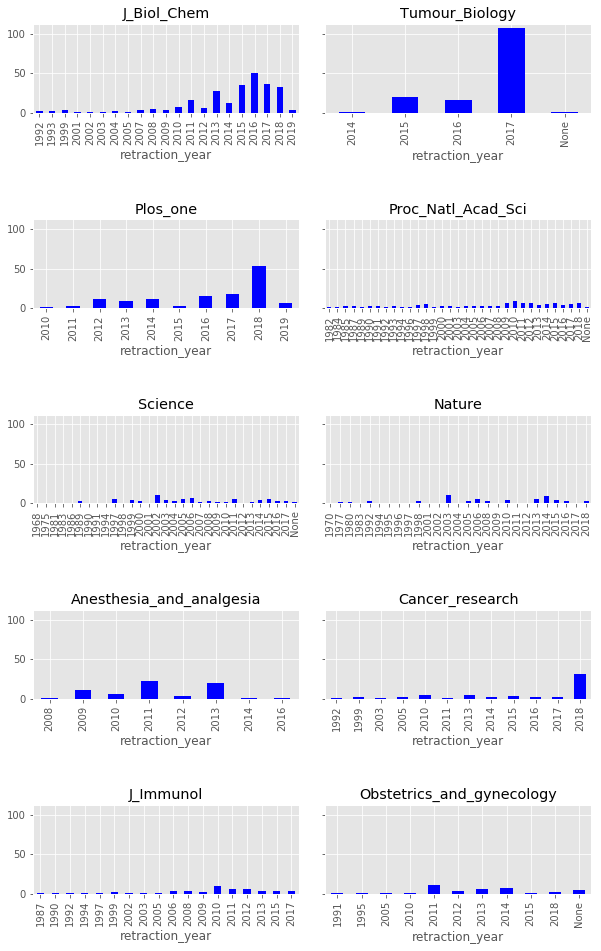

In [357]:
# checking the distribution of retractions in top 10 journals based on the retraction year
df_lst=['J_Biol_Chem','Tumour_Biology','Plos_one','Proc_Natl_Acad_Sci','Science','Nature','Anesthesia_and_analgesia','Cancer_research','J_Immunol','Obstetrics_and_gynecology']
dicti={'J_Biol_Chem':J_Biol_Chem,'Tumour_Biology':Tumour_Biology,'Plos_one':Plos_one,'Proc_Natl_Acad_Sci':Proc_Natl_Acad_Sci,'Science':Science,'Nature':Nature,'Anesthesia_and_analgesia':Anesthesia_and_analgesia,'Cancer_research':Cancer_research,'J_Immunol':J_Immunol,'Obstetrics_and_gynecology':Obstetrics_and_gynecology}
fig,axes=plt.subplots(5,2, sharey=True , figsize=(10,16))
plt.subplots_adjust (hspace=1.2, wspace=0.1)
i=0

for item in df_lst:
    #print(dicti[item])
    countx=dicti[item].groupby('retraction_year')['article'].count()
    pp=pd.DataFrame({'new_c':countx})
    pp.reset_index().plot(kind='bar',y='new_c',x='retraction_year',ax=axes[i//2][i%2],legend=False, color='blue')
    plt.xticks(rotation=90)
    axes[i//2][i%2].set_title(item)
    i+=1


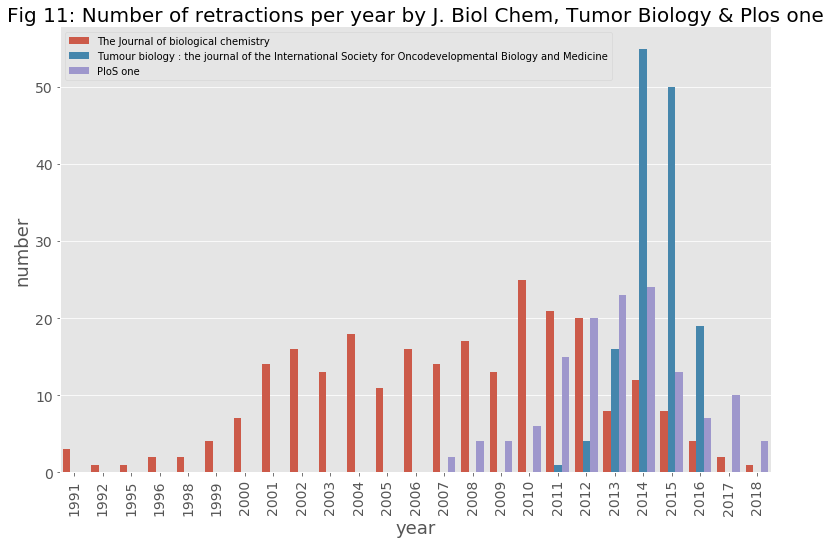

In [358]:
# distribution of retractions of top 3 journals
sns.catplot('pub_year',data=pd.concat([J_Biol_Chem,Tumour_Biology,Plos_one],ignore_index=True),kind='count',hue='journal',height=7, aspect=3/ 2,legend=False)
plt.ylabel("number",fontsize=18)
plt.xlabel("year",fontsize=18)
plt.xticks(rotation=90)
plt.title('Fig 11: Number of retractions per year by J. Biol Chem, Tumor Biology & Plos one',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc='upper left',fontsize=10)

In [359]:
# dataframe showing number of publications (found from pubmed for the top 10 journals)
# calculated retraction-rate and ret-per-10000 
journals_pub=pd.read_csv('journals-pub.csv')

In [360]:
journals_pub

,journals,num-publications,num-retractions,retraction-rate,ret-per-10000,short_name
0,The Journal of biological chemistry,178123,253,0.001420,14.203668,J. Biol Chem
1,Tumour biology : the journal of the Internatio...,7175,145,0.020209,202.090592,Tumour Biology
2,Plos one,210926,132,0.000626,6.258119,PloS one
3,Proceedings of the National Academy of Science...,135148,106,0.000784,7.843253,Proc Natl Acad Sci
4,"Science (New York, N.Y.)",174596,89,0.000510,5.097482,Science
5,Nature,114142,72,0.000631,6.307932,Nature
6,Anesthesia and analgesia,24895,65,0.002611,26.109661,Anesthesia and analgesia
7,Cancer research,51313,56,0.001091,10.913414,Cancer research
8,"Journal of immunology (Baltimore, Md. : 1950)",65401,50,0.000765,7.645143,J. Immunol.
9,Obstetrics and gynecology,26954,40,0.001484,14.840098,Obstetrics and gynecology


In [361]:
journals_pub=journals_pub.sort_values(by='ret-per-10000', ascending=False)
journals_pub

,journals,num-publications,num-retractions,retraction-rate,ret-per-10000,short_name
15,Diagnostic pathology,1662,38,0.022864,228.640192,Diagnostic pathology
1,Tumour biology : the journal of the Internatio...,7175,145,0.020209,202.090592,Tumour Biology
11,Canadian journal of anaesthesia = Journal cana...,7936,39,0.004914,49.143145,Canadian journal of anaesthesia
18,Molecular biology reports,6814,31,0.004549,45.494570,Molecular biology reports
6,Anesthesia and analgesia,24895,65,0.002611,26.109661,Anesthesia and analgesia
10,Cell,19802,39,0.001969,19.694980,Cell
13,"Acta crystallographica. Section E, Structure r...",23618,39,0.001651,16.512829,Acta Crystal. Sect. E Str Rep
19,British journal of anaesthesia,18691,30,0.001605,16.050506,Br J Anaesth
9,Obstetrics and gynecology,26954,40,0.001484,14.840098,Obstetrics and gynecology
17,Molecular and cellular biology,22524,33,0.001465,14.651039,Molecular and cellular biology


Text(0.5,1,'Fig 12: Retraction per 10000 publications')

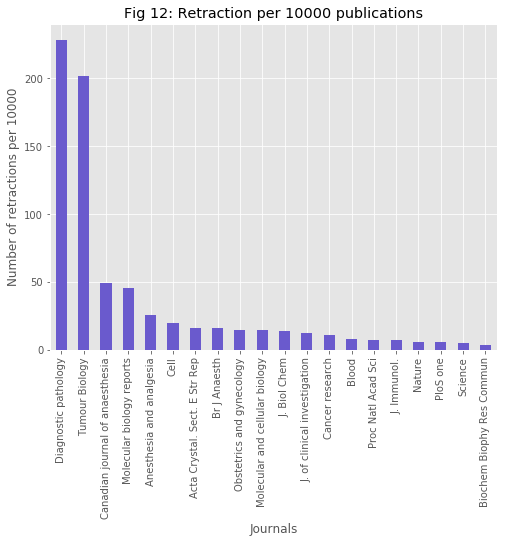

In [781]:
fig,ax=plt.subplots(figsize=(8,6))
journals_pub.plot(x='short_name',y='ret-per-10000',kind='bar',color='slateblue',ax=ax, legend=False)
plt.xticks(rotation=90)
plt.ylabel('Number of retractions per 10000')
plt.xlabel('Journals')
plt.title('Fig 12: Retraction per 10000 publications')

In [363]:
journals_pub2=journals_pub.sort_values(by='num-publications', ascending=False)
journals_pub2

,journals,num-publications,num-retractions,retraction-rate,ret-per-10000,short_name
2,Plos one,210926,132,0.000626,6.258119,PloS one
0,The Journal of biological chemistry,178123,253,0.001420,14.203668,J. Biol Chem
4,"Science (New York, N.Y.)",174596,89,0.000510,5.097482,Science
3,Proceedings of the National Academy of Science...,135148,106,0.000784,7.843253,Proc Natl Acad Sci
5,Nature,114142,72,0.000631,6.307932,Nature
16,Biochemical and biophysical research communica...,85866,34,0.000396,3.959658,Biochem Biophy Res Commun
8,"Journal of immunology (Baltimore, Md. : 1950)",65401,50,0.000765,7.645143,J. Immunol.
7,Cancer research,51313,56,0.001091,10.913414,Cancer research
14,Blood,46778,39,0.000834,8.337253,Blood
12,The Journal of clinical investigation,30567,39,0.001276,12.758858,J. of clinical investigation


Text(0.5,1,'Fig 13: Publication record')

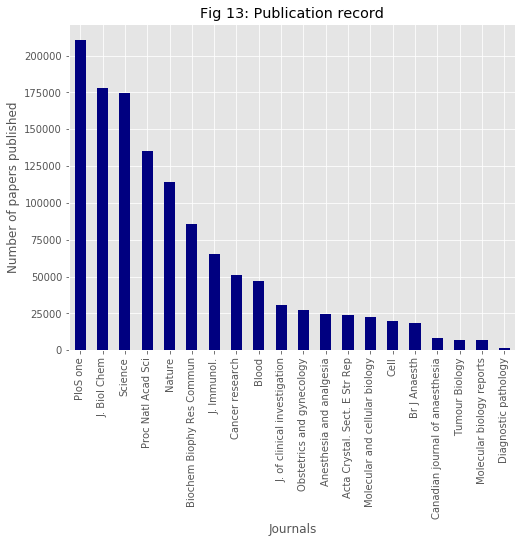

In [778]:
fig,ax=plt.subplots(figsize=(8,6))
journals_pub2.plot(x='short_name',y='num-publications',kind='bar',color='navy',ax=ax, legend=False)
#sns.catplot(x='journals',y='num-publications',data=journals_pub,height=6, aspect=3/ 2,kind='bar', color='navy')
plt.xticks(rotation=90)
plt.ylabel('Number of papers published')
plt.xlabel('Journals')
plt.title('Fig 13: Publication record')

In [368]:
ret=retraction['journal'].value_counts().sort_values(ascending=False)

In [369]:
retr=pd.DataFrame({'number':ret})

In [371]:
#retr.head(20)

In [372]:
# grouping journals on the basis on number of retractions
retr.loc[(retr['number']>200), 'offenders']='200 - above'
retr.loc[(retr['number']>50) & (retr['number']<=200), 'offenders']='51-200'
retr.loc[(retr['number']>10) & (retr['number']<=50), 'offenders']='11-50'
retr.loc[(retr['number']>5) & (retr['number']<=10), 'offenders']='6-10'
retr.loc[(retr['number']>1) & (retr['number']<=5), 'offenders']='2-5'
retr.loc[(retr['number']==1), 'offenders']='1'

In [373]:
x=retr.groupby('offenders').count()
x

,number
offenders,
1,1078
11-50,83
2-5,692
200 - above,1
51-200,7
6-10,127


In [374]:
x.sort_values('number',ascending=False)

,number
offenders,
1,1078
2-5,692
6-10,127
11-50,83
51-200,7
200 - above,1


Text(0.5,1,'Fig 10: Range of Journals with number of retractions')

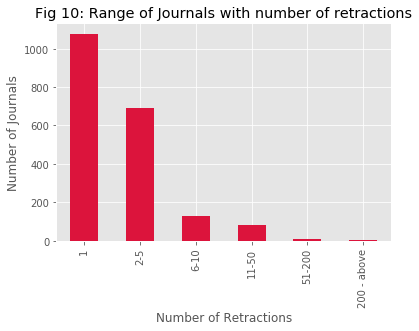

In [376]:
x.sort_values('number',ascending=False).plot(kind='bar',legend=None,color='crimson')
plt.ylabel('Number of Journals')
plt.xlabel('Number of Retractions')
plt.title('Fig 10: Range of Journals with number of retractions')

In [377]:
# making a dataframe for impact factors obtained from Clarivate Analytics
impact=pd.read_csv('journals_impact_factor.csv')

In [378]:
# following steps are for processing impact datframe
impact['Full Journal Title']=impact['Full Journal Title'].str.replace('&','and').str.strip()

In [379]:
impact['Full Journal Title']=impact['Full Journal Title'].str.lower()

In [380]:
def replace(x):
    replacement=['-',';',',']
    for r in replacement:
        if r in x:
            new_x=x.replace(r,'')
            return new_x
        else:
            return x
impact['title']=impact['Full Journal Title'].apply(replace)
impact['title']=impact['title'].str.replace(' ','')

In [381]:
def splitting (x):
    if '(' in x:
        x_split=x.split('(')
        return x_split[0].strip()
    
    else:
        return x.strip()
impact['title']=impact['title'].apply(splitting)

In [382]:
impact.head(2)

,Unnamed: 0,Rank,Full Journal Title,Total Cites,Journal Impact Factor,Eigenfactor Score,title
0,0,1,ca-a cancer journal for clinicians,"28,839",244.585,0.06603,caacancerjournalforclinicians
1,1,2,new england journal of medicine,"332,830",79.258,0.70200,newenglandjournalofmedicine


In [383]:
impact=impact.drop('Unnamed: 0', axis=1)

In [384]:
impact=impact.drop_duplicates(keep='first')

In [385]:
impact[impact['Full Journal Title']=='proceedings of the national academy of sciences of the united  states of america']=impact[impact['Full Journal Title']=='proceedings of the national academy of sciences of the united  states of america'].replace('proceedings of the national academy of sciences of the united  states of america','proceedings of the national academy of sciences of the united states of america')

In [386]:
impact.head(2)

,Rank,Full Journal Title,Total Cites,Journal Impact Factor,Eigenfactor Score,title
0,1,ca-a cancer journal for clinicians,"28,839",244.585,0.06603,caacancerjournalforclinicians
1,2,new england journal of medicine,"332,830",79.258,0.70200,newenglandjournalofmedicine


In [387]:
# following steps are for processing retraction dataframe
retraction['journal']=retraction['journal'].str.replace('&','and').str.strip()

In [388]:
retraction['title']=retraction['journal'].apply(replace)
retraction['title']=retraction['title'].str.replace(' ','')

In [389]:
retraction['journal']=retraction['journal'].apply(splitting)
retraction['title']=retraction['title'].apply(splitting)

In [390]:
def get_rid_of_the(x):
    
    if x[0:3]=='the':
        new_x=x.split('the')
        return new_x[1].strip() 
    else:
        return x.strip()
        
retraction['journal']=retraction['journal'].apply(get_rid_of_the)
retraction['title']=retraction['title'].apply(get_rid_of_the)

In [391]:
def get_rid_of_dots(x):
    if ':' in x:
        new_x=x.split(':')
        return new_x[0].strip() 
    else:
        return x.strip()
        
retraction['journal']=retraction['journal'].apply(get_rid_of_dots)
retraction['title']=retraction['title'].apply(get_rid_of_dots)

In [392]:
def get_rid_of_equal(x):
    if '=' in x:
        new_x=x.split('=')
        return new_x[0].strip() 
    else:
        return x.strip()
        
retraction['journal']=retraction['journal'].apply(get_rid_of_equal)
retraction['title']=retraction['title'].apply(get_rid_of_equal)

In [393]:
retraction['title']=retraction['title'].str.replace(' ','')

In [394]:
retraction['title'].head(2)

0    Molecularpharmacology
1        DNAandcellbiology
Name: title, dtype: object

In [395]:
retraction['journal']=retraction['journal'].str.lower()

In [396]:
retraction['title']=retraction['title'].str.lower()

In [397]:
# merging the 2 dataframes
retraction_merged=pd.merge(retraction,impact,how='left',left_on='title', right_on='title')

In [398]:
retraction_merged.head(2)

,article,year,month,day,authors,journal,affiliation,abstract,keys,retraction_year,retraction_date,retraction_month,retraction_day,pub_year,pub_month,pub_day,abbname,pubmed_date,pubmed_month,newday,newmonth,new_retraction_day,title,Rank,Full Journal Title,Total Cites,Journal Impact Factor,Eigenfactor Score
0,Inhibition of KCNQ2/3 channels by HN38 and XE9...,2018,12,7,"Elizabeth Rodier,Zachary Niday,Klarita Doci,Le...",molecular pharmacology,"[University of Connecticut., University of Con...",Recent studies identified HN38 as a novel KCNQ...,"Epilepsy,Ion channels,Kv channels",2019,2019 Feb,Feb,,2018,Nov,30,"E Rodier,Z Niday,K Doci,L Wang,FJ Nan,ZB Gao,A...",2018-12-07,Dec,30,Nov,15,molecularpharmacology,1412.0,molecular pharmacology,"18,308",3.978,0.01600
1,Retracted: Long Noncoding RNA SOX2OT Accelerat...,2018,11,28,"Li Ma,Xingzhen Sun,Wenxia Kuai,Jian Hu,Yufang ...",dna and cell biology,"[Department of Pediatrics, The Affiliated Huai...",ATCC. www.lgcstandards-atcc.org/Products/All/C...,"FOXP4,SOX2OT,Wilms’ tumor,miR-363",2018,2018 Dec,Dec,21,2018,Nov,27,"L Ma,X Sun,W Kuai,J Hu,Y Yuan,W Feng,X Lu",2018-11-28,Nov,27,Nov,21,dnaandcellbiology,3242.0,dna and cell biology,"2,909",2.634,0.00374


In [399]:
# checking missing values for impact factor
retraction_merged[retraction_merged['Journal Impact Factor'].isnull()]['article'].count()

1767

In [400]:
# filling missing values with 0
retraction_merged['Journal Impact Factor']=retraction_merged['Journal Impact Factor'].fillna(0)

In [401]:
retraction_merged['Journal Impact Factor']=retraction_merged['Journal Impact Factor'].astype(float)

In [402]:
#making a datframe to check missing values for impact factor
retro=retraction_merged[retraction_merged['Journal Impact Factor'].isnull()]

In [403]:
retro['journal'].value_counts()

Series([], Name: journal, dtype: int64)

In [404]:
#retraction_merged['Journal Impact Factor'].value_counts().sort_index(ascending=False)

In [405]:
# grouping observations on the basis of impact factors
retraction_merged.loc[retraction_merged['Journal Impact Factor']==0, 'IF_range']='0'
retraction_merged.loc[(retraction_merged['Journal Impact Factor']>0) & (retraction_merged['Journal Impact Factor']<=5), 'IF_range']='1-5'
retraction_merged.loc[(retraction_merged['Journal Impact Factor']>5) & (retraction_merged['Journal Impact Factor']<=10), 'IF_range']='5-10'
retraction_merged.loc[(retraction_merged['Journal Impact Factor']>10) & (retraction_merged['Journal Impact Factor']<=20), 'IF_range']='10-20'
retraction_merged.loc[(retraction_merged['Journal Impact Factor']>20) & (retraction_merged['Journal Impact Factor']<=30), 'IF_range']='20-30'
retraction_merged.loc[(retraction_merged['Journal Impact Factor']>30) & (retraction_merged['Journal Impact Factor']<=40), 'IF_range']='30-40'
retraction_merged.loc[(retraction_merged['Journal Impact Factor']>40) & (retraction_merged['Journal Impact Factor']<=50), 'IF_range']='40-50'
retraction_merged.loc[(retraction_merged['Journal Impact Factor']>50) & (retraction_merged['Journal Impact Factor']<=60), 'IF_range']='50-60'
retraction_merged.loc[(retraction_merged['Journal Impact Factor']>60) & (retraction_merged['Journal Impact Factor']<=70), 'IF_range']='60-70'
retraction_merged.loc[(retraction_merged['Journal Impact Factor']>70) & (retraction_merged['Journal Impact Factor']<=80), 'IF_range']='70-80'

In [406]:
retraction_merged['IF_range'].value_counts()

1-5      3272
0        1767
5-10      853
10-20     290
40-50     173
30-40      59
20-30      50
50-60      21
Name: IF_range, dtype: int64

In [407]:
retraction_merged['Journal_IF']=retraction_merged['Journal Impact Factor'].round()

In [408]:
retraction_merged['Journal_IF'].value_counts().sort_values(ascending=False)

0.0     1786
3.0     1095
2.0      917
4.0      585
1.0      441
5.0      336
6.0      266
7.0      159
10.0     143
9.0      108
41.0      90
15.0      85
8.0       84
42.0      72
14.0      53
31.0      39
19.0      35
12.0      34
17.0      23
53.0      21
26.0      15
21.0      13
48.0      11
33.0      11
20.0      11
23.0      11
11.0       9
18.0       6
13.0       6
22.0       6
39.0       5
27.0       4
36.0       3
25.0       1
37.0       1
Name: Journal_IF, dtype: int64

Text(0.5,1,'Fig 14: Number of retractions by impact factor')

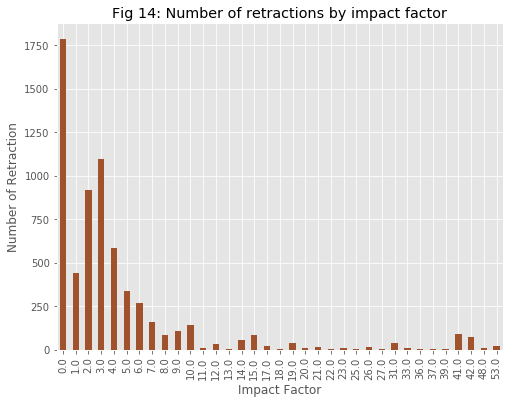

In [780]:
# plottting bar graph of number of retractions vs impact factor
fig,ax=plt.subplots(figsize=(8,6))
retraction_merged['Journal_IF'].value_counts().sort_index().plot(kind='bar',color='sienna')
plt.ylabel('Number of Retraction')
plt.xlabel('Impact Factor')
plt.title('Fig 14: Number of retractions by impact factor')

In [410]:
#retraction_merged[retraction_merged['Journal_IF']==41.0]

In [411]:
#retraction_merged[retraction_merged['Journal_IF']==42.0]

In [412]:
# processing country_year_2 dataframe as done for the retraction dataframe
country_year_2['journal']=country_year_2['journal'].str.replace('&','and').str.strip()

In [413]:
country_year_2['title']=country_year_2['journal'].apply(replace)
country_year_2['title']=country_year_2['title'].str.replace(' ','')

In [414]:
country_year_2['journal']=country_year_2['journal'].apply(splitting)
country_year_2['title']=country_year_2['title'].apply(splitting)

In [415]:
country_year_2['journal']=country_year_2['journal'].apply(get_rid_of_the)
country_year_2['title']=country_year_2['title'].apply(get_rid_of_the)

In [416]:
country_year_2['journal']=country_year_2['journal'].apply(get_rid_of_dots)
country_year_2['title']=country_year_2['title'].apply(get_rid_of_dots)

In [417]:
country_year_2['journal']=country_year_2['journal'].apply(get_rid_of_equal)
country_year_2['title']=country_year_2['title'].apply(get_rid_of_equal)

In [418]:
country_year_2['title']=country_year_2['title'].str.replace(' ','')

In [419]:
country_year_2['journal']=country_year_2['journal'].str.lower()

In [420]:
country_year_2['title']=country_year_2['title'].str.lower()

In [421]:
# combining country_year_2 and impact dataframes
country_merged=pd.merge(country_year_2,impact,how='left',left_on='title', right_on='title')

In [422]:
country_merged.head(2)

,country,year,journal,title,Rank,Full Journal Title,Total Cites,Journal Impact Factor,Eigenfactor Score
0,China,2018,molecular pharmacology,molecularpharmacology,1412.0,molecular pharmacology,"18,308",3.978,0.016
1,United States,2018,molecular pharmacology,molecularpharmacology,1412.0,molecular pharmacology,"18,308",3.978,0.016


In [423]:
country_merged[country_merged['Journal Impact Factor'].isnull()].count()

country                  1677
year                     1677
journal                  1677
title                    1677
Rank                        0
Full Journal Title          0
Total Cites                 0
Journal Impact Factor       0
Eigenfactor Score           0
dtype: int64

In [424]:
country_merged['Journal Impact Factor']=country_merged['Journal Impact Factor'].fillna(0)
country_merged['Journal Impact Factor']=country_merged['Journal Impact Factor'].astype(float)
country_merged['Journal_IF']=country_merged['Journal Impact Factor'].round()
country_merged['Journal_IF'].value_counts()

0.0     1688
3.0     1108
2.0      904
4.0      623
1.0      418
5.0      306
6.0      263
7.0      151
10.0     146
9.0      110
8.0       91
41.0      87
15.0      78
42.0      68
14.0      55
12.0      42
31.0      41
19.0      30
53.0      23
17.0      20
26.0      15
21.0      12
48.0      11
20.0      10
39.0       9
33.0       9
23.0       9
18.0       7
22.0       6
11.0       6
27.0       4
36.0       3
13.0       3
25.0       1
37.0       1
Name: Journal_IF, dtype: int64

In [425]:
# grouping on the basis of impact factor and making a separate column for the impact factor range
country_merged.loc[country_merged['Journal Impact Factor']==0, 'IF_range']='0'
country_merged.loc[(country_merged['Journal Impact Factor']>0) & (country_merged['Journal Impact Factor']<=5), 'IF_range']='1-5'
country_merged.loc[(country_merged['Journal Impact Factor']>5) & (country_merged['Journal Impact Factor']<=10), 'IF_range']='6-10'
country_merged.loc[(country_merged['Journal Impact Factor']>10) & (country_merged['Journal Impact Factor']<=20), 'IF_range']='11-20'
country_merged.loc[(country_merged['Journal Impact Factor']>20) & (country_merged['Journal Impact Factor']<=30), 'IF_range']='21-30'
country_merged.loc[(country_merged['Journal Impact Factor']>30) & (country_merged['Journal Impact Factor']<=40), 'IF_range']='31-40'
country_merged.loc[(country_merged['Journal Impact Factor']>40) & (country_merged['Journal Impact Factor']<=50), 'IF_range']='41-50'
country_merged.loc[(country_merged['Journal Impact Factor']>50) & (country_merged['Journal Impact Factor']<=60), 'IF_range']='51-60'
country_merged.loc[(country_merged['Journal Impact Factor']>60) & (country_merged['Journal Impact Factor']<=70), 'IF_range']='61-70'
country_merged.loc[(country_merged['Journal Impact Factor']>70) & (country_merged['Journal Impact Factor']<=80), 'IF_range']='71-80'

In [426]:
# making separate dataframes for the top 5 countries with maximum retractions
USA=country_merged[(country_merged['country']=='United States')]
Japan=country_merged[(country_merged['country']=='Japan')]
India=country_merged[(country_merged['country']=='India')]
Germany=country_merged[(country_merged['country']=='Germany')]
China=country_merged[(country_merged['country']=='China')]

In [427]:
USA.head(2)

,country,year,journal,title,Rank,Full Journal Title,Total Cites,Journal Impact Factor,Eigenfactor Score,Journal_IF,IF_range
1,United States,2018,molecular pharmacology,molecularpharmacology,1412.0,molecular pharmacology,"18,308",3.978,0.016,4.0,1-5
14,United States,2018,case reports in surgery,casereportsinsurgery,NaN,NaN,NaN,0.000,NaN,0.0,0


In [428]:
# finding out percentage of different categories of impact factor groups for the gven countries
df_lst2=['USA','China','Japan','India','Germany']
dicti2={'USA':USA,'China':China,'Japan':Japan,'India':India,'Germany':Germany}
for item in df_lst2:
    
    dicti2[item]['added']=dicti2[item].groupby('IF_range')['country'].transform(lambda x:x.count())
    total_sum=dicti2[item]['added'].count()
    dicti2[item]['perc']=dicti2[item]['added']*100/total_sum
    

In [429]:
China.head(100)

,country,year,journal,title,Rank,Full Journal Title,Total Cites,Journal Impact Factor,Eigenfactor Score,Journal_IF,IF_range,added,perc
0,China,2018,molecular pharmacology,molecularpharmacology,1412.0,molecular pharmacology,"18,308",3.978,0.01600,4.0,1-5,749,62.730318
2,China,2018,dna and cell biology,dnaandcellbiology,3242.0,dna and cell biology,"2,909",2.634,0.00374,3.0,1-5,749,62.730318
5,China,2018,journal of clinical psychopharmacology,journalofclinicalpsychopharmacology,2368.0,journal of clinical psychopharmacology,"4,928",3.134,0.00534,3.0,1-5,749,62.730318
7,China,2018,medicine,medicine,4729.0,medicine,"18,707",2.028,0.04568,2.0,1-5,749,62.730318
8,China,2018,metallomics,metallomics,1339.0,metallomics,"4,240",4.069,0.00960,4.0,1-5,749,62.730318
16,China,2018,neural regeneration research,neuralregenerationresearch,4178.0,neural regeneration research,"2,801",2.234,0.00751,2.0,1-5,749,62.730318
21,China,2018,plant molecular biology,plantmolecularbiology,1820.0,plant molecular biology,"13,723",3.543,0.01051,4.0,1-5,749,62.730318
22,China,2018,cellular physiology and biochemistry,cellularphysiologyandbiochemistry,714.0,cellular physiology and biochemistry,"11,234",5.500,0.01745,6.0,6-10,94,7.872697
24,China,2018,foodborne pathogens and disease,foodbornepathogensanddisease,3582.0,foodborne pathogens and disease,"3,531",2.476,0.00647,2.0,1-5,749,62.730318
25,China,2018,oncotargets and therapy,oncotargetsandtherapy,3190.0,oncotargets and therapy,"5,065",2.656,0.01257,3.0,1-5,749,62.730318


In [430]:
# finding sizes (percentage of the country in a given impact factor group) 
#and labels (impact factor groups) for the 5 countries, that is needed for 
#making pie charts later
sizes2=China['perc'].unique()

In [431]:
labels2 =China['IF_range'].unique()

In [432]:
sizes2,labels2

(array([62.73031826,  7.87269682,  0.25125628, 27.72194305,  1.17252931,
         0.16750419,  0.08375209]),
 array(['1-5', '6-10', '31-40', '0', '11-20', '51-60', '41-50'],
       dtype=object))

In [433]:
sizes2=[62.73031826, 0.25125628, 7.87269682,0.08375209,   27.72194305,  1.17252931,
         0.16750419  ]
labels2=['1-5 IF', '31-40 IF','6-10 IF','41-50 IF',  '0 IF', '11-20 IF', '51-60 IF' ]

In [434]:
sizes1=USA['perc'].unique()
labels1 =USA['IF_range'].unique()

In [435]:
sizes1,labels1

(array([39.0555201 , 23.73962987, 19.52776005,  8.42373963,  5.61582642,
         1.91448628,  1.53158902,  0.19144863]),
 array(['1-5', '0', '6-10', '11-20', '41-50', '31-40', '21-30', '51-60'],
       dtype=object))

In [436]:
sizes1=[39.0555201 ,0.19144863, 23.73962987,1.53158902 , 19.52776005,  8.42373963,1.91448628,  5.61582642,
            ]
labels1=['1-5 IF','51-60 IF', '0 IF','21-30 IF', '6-10 IF', '11-20 IF','31-40 IF', '41-50 IF'   ]

In [437]:
sizes3=Japan['perc'].unique()
labels3 =Japan['IF_range'].unique()

In [438]:
sizes3,labels3

(array([55.91985428, 21.31147541, 13.84335155,  0.54644809,  4.73588342,
         2.18579235,  1.09289617,  0.36429872]),
 array(['1-5', '0', '6-10', '21-30', '11-20', '41-50', '31-40', '51-60'],
       dtype=object))

In [439]:
sizes3=[55.91985428,0.36429872, 21.31147541,1.09289617,  13.84335155,  0.54644809,  4.73588342,
         2.18579235,   ]
labels3=['1-5 IF','51-60 IF', '0 IF', '31-40 IF','6-10 IF', '21-30 IF', '11-20 IF', '41-50 IF',  ]

In [440]:
sizes4=India['perc'].unique()
labels4 =India['IF_range'].unique()

In [441]:
sizes4,labels4

(array([45.75, 41.5 , 11.5 ,  0.25,  1.  ]),
 array(['1-5', '0', '6-10', '41-50', '11-20'], dtype=object))

In [442]:
sizes4=[45.75,1. , 41.5 , 11.5 ,  0.25   ]
labels4=['1-5 IF','11-20 IF', '0 IF', '6-10 IF', '41-50 IF' ]

In [443]:
sizes5=Germany['perc'].unique()
labels5 =Germany['IF_range'].unique()

In [444]:
sizes5,labels5

(array([19.10828025, 50.63694268,  6.68789809, 17.19745223,  3.50318471,
         0.95541401,  1.27388535,  0.63694268]),
 array(['0', '1-5', '11-20', '6-10', '41-50', '51-60', '31-40', '21-30'],
       dtype=object))

In [445]:
sizes5=[19.10828025,0.63694268, 50.63694268,1.27388535,  6.68789809, 17.19745223,  3.50318471,
         0.95541401   ]
labels5=['0 IF', '21-30 IF','1-5 IF','31-40 IF', '11-20 IF', '6-10 IF', '41-50 IF', '51-60 IF'  ]

Text(0.5,0.98,'Fig 16: Percentage of retracted papers in different impact factor journals ')

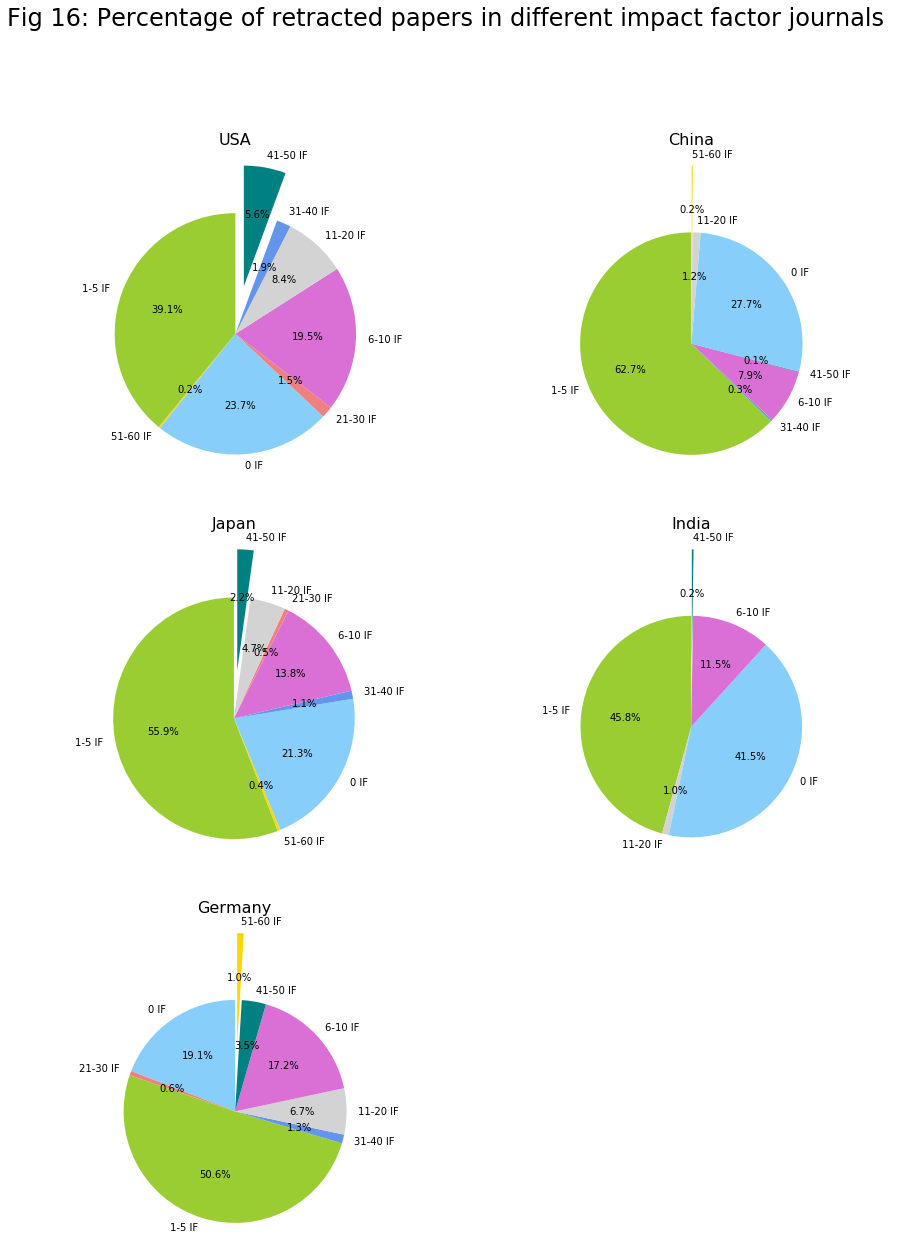

In [785]:
# making pie charts for each country showing distribution of their retracted papers 
# for different impact factor groups
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2, figsize=(15,20))

sizes1=[39.0555201 ,0.19144863, 23.73962987,1.53158902 , 19.52776005,  8.42373963,1.91448628,  5.61582642]
labels1=['1-5 IF','51-60 IF', '0 IF','21-30 IF', '6-10 IF', '11-20 IF','31-40 IF', '41-50 IF'   ]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','orchid','lightgrey','cornflowerblue','teal']
ax1=plt.subplot(3,2,1)
explodeTuple1 = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.4)
ax1.pie(sizes1,  labels=labels1, autopct='%1.1f%%', startangle=90,explode=explodeTuple1,colors=colors)
ax1.axis('equal')  
ax1.set_title('USA',fontsize=16)

sizes2=[62.73031826, 0.25125628, 7.87269682,0.08375209,   27.72194305,  1.17252931,
         0.16750419  ]
labels2=['1-5 IF', '31-40 IF','6-10 IF','41-50 IF',  '0 IF', '11-20 IF', '51-60 IF' ]
colors = ['yellowgreen','cornflowerblue','orchid', 'teal','lightskyblue','lightgrey','gold']
ax2=plt.subplot(3,2,2)
explodeTuple = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.6)
ax2.pie(sizes2,  labels=labels2, autopct='%1.1f%%', startangle=90,explode=explodeTuple,colors=colors )
ax2.axis('equal')  
ax2.set_title('China',fontsize=16)



sizes3=[55.91985428,0.36429872, 21.31147541,1.09289617,  13.84335155,  0.54644809,  4.73588342,
         2.18579235   ]
labels3=['1-5 IF','51-60 IF', '0 IF', '31-40 IF','6-10 IF', '21-30 IF', '11-20 IF', '41-50 IF'  ]
colors=['yellowgreen','gold','lightskyblue','cornflowerblue','orchid','lightcoral','lightgrey','teal']
ax3=plt.subplot(3,2,3)
explodeTuple3 = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.4)
ax3.pie(sizes3,  labels=labels3, autopct='%1.1f%%', startangle=90,explode=explodeTuple3,colors=colors)
ax3.axis('equal') 
ax3.set_title('Japan',fontsize=16)

sizes4=[45.75,1. , 41.5 , 11.5 ,  0.25   ]
labels4=['1-5 IF','11-20 IF', '0 IF', '6-10 IF', '41-50 IF' ]
colors=['yellowgreen','lightgrey','lightskyblue','orchid','teal']
explodeTuple4 = (0.0, 0.0, 0.0, 0.0, 0.6)
ax4=plt.subplot(3,2,4)
ax4.pie(sizes4,  labels=labels4, autopct='%1.1f%%', startangle=90,explode=explodeTuple4,colors=colors)
ax4.axis('equal') 
ax4.set_title('India',fontsize=16)


sizes5=[19.10828025,0.63694268, 50.63694268,1.27388535,  6.68789809, 17.19745223,  3.50318471,
         0.95541401   ]
labels5=['0 IF', '21-30 IF','1-5 IF','31-40 IF', '11-20 IF', '6-10 IF', '41-50 IF', '51-60 IF'  ]
colors=['lightskyblue','lightcoral','yellowgreen','cornflowerblue','lightgrey','orchid','teal','gold']
ax5=plt.subplot(3,2,5)
explodeTuple5 = (0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0, 0.6)
ax5.pie(sizes5,  labels=labels5, autopct='%1.1f%%', startangle=90,explode=explodeTuple5,colors=colors)
ax5.axis('equal')  
ax5.set_title('Germany',fontsize=16)

fig.delaxes(ax6) 
fig.suptitle('Fig 16: Percentage of retracted papers in different impact factor journals ', fontsize=24)

Text(0.5,1,'Fig 15: Retraction trend for the top five countries with highest retractions')

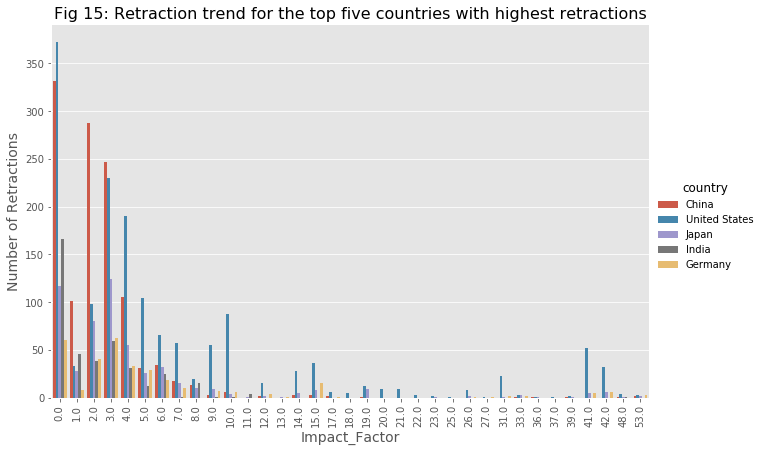

In [782]:
# plot showing  distribution of retractions of each country with respect to journal's impact factor
sns.catplot('Journal_IF',data=pd.concat([China,USA,Japan,India,Germany]),hue='country',kind='count', height=6, aspect=3/2)
plt.xticks(rotation=90)
plt.ylabel('Number of Retractions',fontsize=14)
plt.xlabel('Impact_Factor',fontsize=14)
plt.title('Fig 15: Retraction trend for the top five countries with highest retractions', fontsize=16)